In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cbook as cbook

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

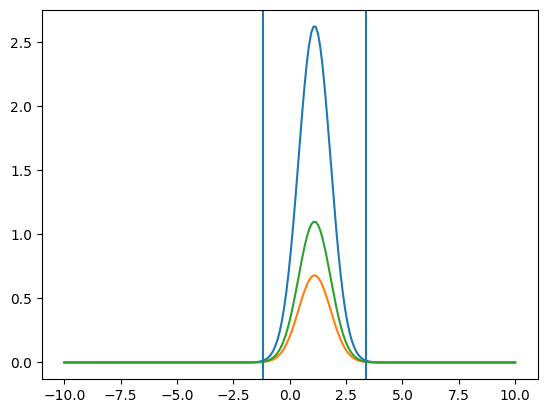

*Extracting Pieces for TH2*
Available Functions:
	Num_Xbins(TH2_) returns number of X bins for a TH2
	Num_Ybins(TH2_) returns number of Y bins for a TH2
	XEdges_2d(TH2_) returns edges of x bins for a TH2
	YEdges_2d(TH2_) returns edges of y bins for a TH2
	Center_Xbins(TH2_) returns center values for x bins for a TH2
	Center_Ybins(TH2_) returns center value for y bins for a TH2
	XY_Values(TH2_) returns a 2D np.array for z values arranged [x][y] for a TH2
	YX_Values(TH2_) returns a 2D np.array for z values arranged [y][x] for a TH2
Enjoy using TH2s

0.014000000000000012
You have access to information regarding all bin numbers, bin maxes, bin mins
Each goes _VAR_max_ min, bins, res, etc. 
All the names of them as well as edges.
Q2_Bin_Name[ 5 ]
W_Bin_Name[ 29 ]
MM1_Bin_Name[ 14 ]
MM2_Bin_Name[ 14 ]
theta_Bin_Name[ 10 ]
alpha_Bin_Name[ 10 ]
phi_Bin_Name[ 10 ]
_var_set_name_ [i]
_Xij_name_[i][j]
Also _mm1_name_ etc. for all Xijs
def Q2_Corr(Q2bin_) corrects the cross section for simulation 

In [2]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions-uproot3.ipynb
#uproot3
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to the proper binning for the the various variables
%run /Users/cmc/analysis_phd/fitting/single_diff/Friend\ Binning\ Values.ipynb

In [3]:
#date="06-13-2022"
exp_date="08-18-2024"
sim_date="08-22-2024"
par="pip"
run="e16"
exp_dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+exp_date
sim_dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+sim_date
#root_file=dir+"/exp_mm_"+par+"_e16_"+date+"_"+SLURM_ID+".root"
root_file_exp=exp_dir+"/exp_"+run+"_clas6_kin_eff_"+par+"_"+exp_date+".root"
root_file_sim=sim_dir+"/sim_"+run+"_clas6_kin_eff_"+par+"_"+sim_date+".root"
xfile=uproot3.open(root_file_exp)
rfile=uproot3.open(root_file_sim)

In [4]:
good_sc_paddles = [[True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,False,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,False,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,False,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,False],
                   [True,True,False,True,True,False],
                   [True,True,False,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,False,True],
                   [True,True,False,True,False,True],
                   [True,True,True,True,True,True],
                   [True,True,False,True,True,False],
                   [False,False,False,True,True,True],
                   [True,True,False,True,True,True],
                   [True,True,False,True,False,True]]

In [5]:
sel = 1
pid_cut = ["pid","event"]
top = ["mnone","mall"]



layer1 = "Kinematic Efficiency"
layer2 = "kinematic_eff_"+par
layer3 = layer2+"_"+pid_cut[sel]
#layer4 = layer3+"_"+top[sel]
#layer5 = layer4+"_cut"
#print(xfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5].keys())

if sel ==1:
    layer4 = layer3+"_"+top[sel]
    layer5 = layer4+"_cut"
    xhist = [xfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5][i] for i in xfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5].keys()]
    rhist = [rfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5][i] for i in rfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5].keys()]
else:
    xhist = [xfile[layer1+"/"+layer2+"/"+layer3][i] for i in xfile[layer1+"/"+layer2+"/"+layer3].keys()]
    rhist = [rfile[layer1+"/"+layer2+"/"+layer3][i] in range(len(rfile[layer1+"/"+layer2+"/"+layer3].keys()))]



In [6]:
l1 = "Kinematic Efficiency by Segment"
l2 = "Kinematic Efficiency "+par
l3 = ["Kinematic Efficiency "+par+" Sector:"+str(sec+1) for sec in range(6)]
l4 = [["Kinematic_Efficiency_"+par+"_sec"+str(sec+1)+"_Seg:"+str(pad+1) for pad in range(48)] for sec in range(6)]


xhist2 = [[xfile[l1][l2][l3[sec]][l4[sec][pad]] for pad in range(48)] for sec in range(6)]
rhist2 = [[rfile[l1][l2][l3[sec]][l4[sec][pad]] for pad in range(48)] for sec in range(6)]



In [7]:
cut_cols = ['b','g','r']
cut_name= ["tight","mid","loose"]
data_cols = ['m',"c",'y']

Particle=''
Theta = ''
Momentum = ''
if par == "pro":
    Particle = "Proton"
    Momentum='$p_{P}$'
    Theta = "$\u03B8_{P}$"
elif par == "pip":
    Particle = "$\u03C0^+$"
    Momentum='$p_{\u03C0^+}$'
    Theta = "$\u03B8_{\u03C0^+}$"
elif par == "pim":
    Particle = "$\u03C0^-$"
    Momentum='$p_{\u03C0^-}$'
    Theta = "$\u03B8_{\u03C0^-}$"
elif par == "ele":
    Particle = "Electron"
    #Momentum=r'$p_{e}$'
    #Theta = r'$\u03B8_{e}$'
    Momentum='$p_{e}$'
    Theta = '$\u03B8_{e}$'


xname = Momentum+" (GeV)"
yname=Theta+" (degrees)"
print(xname)
print(yname)

$p_{π^+}$ (GeV)
$θ_{π^+}$ (degrees)


In [8]:
#Extracting X and Y bins
#X and Y binning is the same for all sectors
xbins=Center_Xbins(xhist[0])
ybins=Center_Ybins(xhist[0])
#Extracting Zvals for 2d histograms
exp_zvals_xy=[XY_Values(xhist[sec]) for sec in range(6)]
exp_zvals_yx=[YX_Values(xhist[sec]) for sec in range(6)]
sim_zvals_xy=[XY_Values(rhist[sec]) for sec in range(6)] 
sim_zvals_yx=[YX_Values(rhist[sec]) for sec in range(6)]

exp_zvals2_xy=[[XY_Values(xhist2[sec][pad]) for pad in range(48)] for sec in range(6)]
exp_zvals2_yx=[[YX_Values(xhist2[sec][pad]) for pad in range(48)] for sec in range(6)]
sim_zvals2_xy=[[XY_Values(rhist2[sec][pad]) for pad in range(48)] for sec in range(6)] 
sim_zvals2_yx=[[YX_Values(rhist2[sec][pad]) for pad in range(48)] for sec in range(6)]

In [9]:
#Determining Cell Merging 
xmerge=1
ymerge=1

#Merge -> No Zeros
x = Merge_Bins(xbins,xmerge)
y = Merge_Bins(ybins,ymerge)

xedges = Merge_Bin_Edges(XEdges_2d(xhist[0]),xmerge)
yedges = Merge_Bin_Edges(YEdges_2d(xhist[0]),ymerge)
exp_z_xy=[Merge_Z(exp_zvals_xy[sec],xmerge,ymerge) for sec in range(6)]
exp_z_yx=[Merge_Z(exp_zvals_yx[sec],ymerge,xmerge) for sec in range(6)]
sim_z_xy=[Merge_Z(sim_zvals_xy[sec],xmerge,ymerge) for sec in range(6)]
sim_z_yx=[Merge_Z(sim_zvals_yx[sec],ymerge,xmerge) for sec in range(6)]

exp_z2_xy=[[Merge_Z(exp_zvals2_xy[sec][pad],xmerge,ymerge) for pad in range(48)] for sec in range(6)]
exp_z2_yx=[[Merge_Z(exp_zvals2_yx[sec][pad],ymerge,xmerge) for pad in range(48)] for sec in range(6)]
sim_z2_xy=[[Merge_Z(sim_zvals2_xy[sec][pad],xmerge,ymerge) for pad in range(48)] for sec in range(6)]
sim_z2_yx=[[Merge_Z(sim_zvals2_yx[sec][pad],ymerge,xmerge) for pad in range(48)] for sec in range(6)]

# exp_fit_x = [[Remove_Zeros_X(y,exp_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]
# exp_fit_y = [[Remove_Zeros_Y(exp_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]

# sim_fit_x = [[Remove_Zeros_X(y,sim_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]
# sim_fit_y = [[Remove_Zeros_Y(sim_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]


In [10]:
xr_z_xy = np.zeros((6,len(x),len(y)))
xr_z_yx = np.zeros((6,len(y),len(x)))
rx_z_xy = np.zeros((6,len(x),len(y)))
rx_z_yx = np.zeros((6,len(y),len(x)))

xr_z2_xy = np.zeros((6,48,len(x),len(y)))
xr_z2_yx = np.zeros((6,48,len(y),len(x)))
rx_z2_xy = np.zeros((6,48,len(x),len(y)))
rx_z2_yx = np.zeros((6,48,len(y),len(x)))

for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            if sim_z_xy[sec][xbin][ybin] >0.0:
                xr_z_xy[sec][xbin][ybin] = exp_z_xy[sec][xbin][ybin]/sim_z_xy[sec][xbin][ybin]
                xr_z_yx[sec][ybin][xbin] = exp_z_yx[sec][ybin][xbin]/sim_z_yx[sec][ybin][xbin]
            if exp_z_xy[sec][xbin][ybin] >0.0:
                rx_z_xy[sec][xbin][ybin] = sim_z_xy[sec][xbin][ybin]/exp_z_xy[sec][xbin][ybin]
                rx_z_yx[sec][ybin][xbin] = sim_z_yx[sec][ybin][xbin]/exp_z_yx[sec][ybin][xbin]
            for pad in range(48):
                if sim_z2_xy[sec][pad][xbin][ybin] >0.0:
                    xr_z2_xy[sec][pad][xbin][ybin] = exp_z2_xy[sec][pad][xbin][ybin]/sim_z2_xy[sec][pad][xbin][ybin]
                    xr_z2_yx[sec][pad][ybin][xbin] = exp_z2_yx[sec][pad][ybin][xbin]/sim_z2_yx[sec][pad][ybin][xbin]
                if exp_z2_xy[sec][pad][xbin][ybin] >0.0:
                    rx_z2_xy[sec][pad][xbin][ybin] = sim_z2_xy[sec][pad][xbin][ybin]/exp_z2_xy[sec][pad][xbin][ybin]
                    rx_z2_yx[sec][pad][ybin][xbin] = sim_z2_yx[sec][pad][ybin][xbin]/exp_z2_yx[sec][pad][ybin][xbin]
                



In [11]:
xs_z_xy = np.zeros((6,len(x),len(y)))
xs_z_yx = np.zeros((6,len(y),len(x)))
rs_z_xy = np.zeros((6,len(x),len(y)))
rs_z_yx = np.zeros((6,len(y),len(x)))

xs_z2_xy = np.zeros((6,48,len(x),len(y)))
xs_z2_yx = np.zeros((6,48,len(y),len(x)))
rs_z2_xy = np.zeros((6,48,len(x),len(y)))
rs_z2_yx = np.zeros((6,48,len(y),len(x)))

xrs_z_xy = np.zeros((6,len(x),len(y)))
xrs_z_yx = np.zeros((6,len(y),len(x)))
rxs_z_xy = np.zeros((6,len(x),len(y)))
rxs_z_yx = np.zeros((6,len(y),len(x)))

xrs_z2_xy = np.zeros((6,48,len(x),len(y)))
xrs_z2_yx = np.zeros((6,48,len(y),len(x)))
rxs_z2_xy = np.zeros((6,48,len(x),len(y)))
rxs_z2_yx = np.zeros((6,48,len(y),len(x)))

xxs_z_xy = np.zeros((6,len(x),len(y)))
xxs_z_yx = np.zeros((6,len(y),len(x)))
rrs_z_xy = np.zeros((6,len(x),len(y)))
rrs_z_yx = np.zeros((6,len(y),len(x)))

xxs_z2_xy = np.zeros((6,48,len(x),len(y)))
xxs_z2_yx = np.zeros((6,48,len(y),len(x)))
rrs_z2_xy = np.zeros((6,48,len(x),len(y)))
rrs_z2_yx = np.zeros((6,48,len(y),len(x)))

xsx_z_xy = np.zeros((6,len(x),len(y)))
xsx_z_yx = np.zeros((6,len(y),len(x)))
rsr_z_xy = np.zeros((6,len(x),len(y)))
rsr_z_yx = np.zeros((6,len(y),len(x)))

xsx_z2_xy = np.zeros((6,48,len(x),len(y)))
xsx_z2_yx = np.zeros((6,48,len(y),len(x)))
rsr_z2_xy = np.zeros((6,48,len(x),len(y)))
rsr_z2_yx = np.zeros((6,48,len(y),len(x)))

for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            for pad in range(48):
                if good_sc_paddles[pad][sec]:
                    xs_z_xy[sec][xbin][ybin] += exp_z2_xy[sec][pad][xbin][ybin]
                    rs_z_xy[sec][xbin][ybin] += sim_z2_xy[sec][pad][xbin][ybin]
                    xs_z_yx[sec][ybin][xbin] += exp_z2_yx[sec][pad][ybin][xbin]
                    rs_z_yx[sec][ybin][xbin] += sim_z2_yx[sec][pad][ybin][xbin]
                    xs_z2_xy[sec][pad][xbin][ybin] += exp_z2_xy[sec][pad][xbin][ybin]
                    rs_z2_xy[sec][pad][xbin][ybin] += sim_z2_xy[sec][pad][xbin][ybin]
                    xs_z2_yx[sec][pad][ybin][xbin] += exp_z2_yx[sec][pad][ybin][xbin]
                    rs_z2_yx[sec][pad][ybin][xbin] += sim_z2_yx[sec][pad][ybin][xbin]
                    


In [12]:
def min_z(zvals_):
    m = 0
    for i in range(len(zvals_)):
        for j in range(len(zvals_[0])):
            if zvals_[i][j]>0.0:
                if m == 0:
                    m = zvals_[i][j]
                elif m > zvals_[i][j]:
                    m = zvals_[i][j]
    return m

In [13]:
min_z_xs = np.zeros(6)
min_z2_xs = np.zeros((6,48))

max_z_xs = np.zeros(6)
max_z2_xs = np.zeros((6,48))

min_z_rs = np.zeros(6)
min_z2_rs = np.zeros((6,48))

max_z_rs = np.zeros(6)
max_z2_rs = np.zeros((6,48))

min_z_xrs = np.zeros(6)
min_z2_xrs = np.zeros((6,48))

max_z_xrs = np.zeros(6)
max_z2_xrs = np.zeros((6,48))

min_z_rxs = np.zeros(6)
min_z2_rxs = np.zeros((6,48))

max_z_rxs = np.zeros(6)
max_z2_rxs = np.zeros((6,48))

for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            if xs_z_xy[sec][xbin][ybin] >0.0:
                if max_z_xs[sec] < xs_z_xy[sec][xbin][ybin]:
                    max_z_xs[sec] = xs_z_xy[sec][xbin][ybin]
                if min_z_xs[sec] == 0:
                    min_z_xs[sec] = xs_z_xy[sec][xbin][ybin]
                elif min_z_xs[sec] > xs_z_xy[sec][xbin][ybin]:
                    min_z_xs[sec] = xs_z_xy[sec][xbin][ybin]
            if rs_z_xy[sec][xbin][ybin] >0.0:
                if max_z_rs[sec] < rs_z_xy[sec][xbin][ybin]:
                    max_z_rs[sec] = rs_z_xy[sec][xbin][ybin]
                if min_z_rs[sec] == 0:
                    min_z_rs[sec] = rs_z_xy[sec][xbin][ybin]
                elif min_z_rs[sec] > rs_z_xy[sec][xbin][ybin]:
                    min_z_rs[sec] = rs_z_xy[sec][xbin][ybin]
            
                    
                    

In [14]:
for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            if rs_z_xy[sec][xbin][ybin] >0.0:
                xrs_z_xy[sec][xbin][ybin] = xs_z_xy[sec][xbin][ybin]/rs_z_xy[sec][xbin][ybin]
                xrs_z_yx[sec][ybin][xbin] = xs_z_yx[sec][ybin][xbin]/rs_z_yx[sec][ybin][xbin]
                rrs_z_yx[sec][ybin][xbin] = sim_z_yx[sec][ybin][xbin]/rs_z_yx[sec][ybin][xbin]
                rrs_z_xy[sec][xbin][ybin] = sim_z_xy[sec][xbin][ybin]/rs_z_xy[sec][xbin][ybin]
            else:
                xrs_z_xy[sec][xbin][ybin] = xs_z_xy[sec][xbin][ybin]/(min_z_rs[sec]/50.0)
                xrs_z_yx[sec][ybin][xbin] = xs_z_yx[sec][ybin][xbin]/(min_z_rs[sec]/50.0)
                rrs_z_yx[sec][ybin][xbin] = sim_z_yx[sec][ybin][xbin]/(min_z_rs[sec]/50.0)
                rrs_z_xy[sec][xbin][ybin] = sim_z_xy[sec][xbin][ybin]/(min_z_rs[sec]/50.0)
            if xs_z_xy[sec][xbin][ybin] >0.0:
                rxs_z_xy[sec][xbin][ybin] = rs_z_xy[sec][xbin][ybin]/xs_z_xy[sec][xbin][ybin]
                rxs_z_yx[sec][ybin][xbin] = rs_z_yx[sec][ybin][xbin]/xs_z_yx[sec][ybin][xbin]
                xxs_z_yx[sec][ybin][xbin] = exp_z_yx[sec][ybin][xbin]/xs_z_yx[sec][ybin][xbin]
                xxs_z_xy[sec][xbin][ybin] = exp_z_xy[sec][xbin][ybin]/xs_z_xy[sec][xbin][ybin]
            else:
                rxs_z_xy[sec][xbin][ybin] = rs_z_xy[sec][xbin][ybin]/(min_z_xs[sec]/50.0)
                rxs_z_yx[sec][ybin][xbin] = rs_z_yx[sec][ybin][xbin]/(min_z_xs[sec]/50.0)
                xxs_z_yx[sec][ybin][xbin] = exp_z_yx[sec][ybin][xbin]/(min_z_xs[sec]/50.0)
                xxs_z_xy[sec][xbin][ybin] = exp_z_xy[sec][xbin][ybin]/(min_z_xs[sec]/50.0)
            if exp_z_xy[sec][xbin][ybin] >0.0:
                xsx_z_yx[sec][ybin][xbin] = xs_z_yx[sec][ybin][xbin]/exp_z_yx[sec][ybin][xbin]
                xsx_z_xy[sec][xbin][ybin] = xs_z_xy[sec][xbin][ybin]/exp_z_xy[sec][xbin][ybin]
            if sim_z_xy[sec][xbin][ybin] >0.0:
                rsr_z_yx[sec][ybin][xbin] = rs_z_yx[sec][ybin][xbin]/sim_z_yx[sec][ybin][xbin]
                rsr_z_xy[sec][xbin][ybin] = rs_z_xy[sec][xbin][ybin]/sim_z_xy[sec][xbin][ybin]
            for pad in range(48):
                if rs_z2_xy[sec][pad][xbin][ybin] >0.0:
                    xr_z2_xy[sec][pad][xbin][ybin] = xs_z2_xy[sec][pad][xbin][ybin]/rs_z2_xy[sec][pad][xbin][ybin]
                    xr_z2_yx[sec][pad][ybin][xbin] = xs_z2_yx[sec][pad][ybin][xbin]/rs_z2_yx[sec][pad][ybin][xbin]
                    rrs_z2_xy[sec][pad][xbin][ybin] = sim_z2_xy[sec][pad][xbin][ybin]/rs_z2_xy[sec][pad][xbin][ybin]
                    rrs_z2_yx[sec][pad][ybin][xbin] = sim_z2_yx[sec][pad][ybin][xbin]/rs_z2_yx[sec][pad][ybin][xbin]
                else:
                    xr_z2_xy[sec][pad][xbin][ybin] = xs_z2_xy[sec][pad][xbin][ybin]/(min_z_rs[sec]/50.0)
                    xr_z2_yx[sec][pad][ybin][xbin] = xs_z2_yx[sec][pad][ybin][xbin]/(min_z_rs[sec]/50.0)
                    rrs_z2_xy[sec][pad][xbin][ybin] = sim_z2_xy[sec][pad][xbin][ybin]/(min_z_rs[sec]/50.0)
                    rrs_z2_yx[sec][pad][ybin][xbin] = sim_z2_yx[sec][pad][ybin][xbin]/(min_z_rs[sec]/50.0)
                if xs_z2_xy[sec][pad][xbin][ybin] >0.0:
                    rx_z2_xy[sec][pad][xbin][ybin] = rs_z2_xy[sec][pad][xbin][ybin]/xs_z2_xy[sec][pad][xbin][ybin]
                    rx_z2_yx[sec][pad][ybin][xbin] = rs_z2_yx[sec][pad][ybin][xbin]/xs_z2_yx[sec][pad][ybin][xbin]
                    xxs_z2_xy[sec][pad][xbin][ybin] = exp_z2_xy[sec][pad][xbin][ybin]/xs_z2_xy[sec][pad][xbin][ybin]
                    xxs_z2_yx[sec][pad][ybin][xbin] = exp_z2_yx[sec][pad][ybin][xbin]/xs_z2_yx[sec][pad][ybin][xbin]
                else:
                    rx_z2_xy[sec][pad][xbin][ybin] = rs_z2_xy[sec][pad][xbin][ybin]/min_z_xs[sec]
                    rx_z2_yx[sec][pad][ybin][xbin] = rs_z2_yx[sec][pad][ybin][xbin]/min_z_xs[sec]
                    xxs_z2_xy[sec][pad][xbin][ybin] = exp_z2_xy[sec][pad][xbin][ybin]/min_z_xs[sec]
                    xxs_z2_yx[sec][pad][ybin][xbin] = exp_z2_yx[sec][pad][ybin][xbin]/min_z_xs[sec]
                if exp_z2_xy[sec][pad][xbin][ybin] >0.0:
                    xsx_z2_xy[sec][pad][xbin][ybin] = xs_z2_xy[sec][pad][xbin][ybin]/exp_z2_xy[sec][pad][xbin][ybin]
                    xsx_z2_yx[sec][pad][ybin][xbin] = xs_z2_yx[sec][pad][ybin][xbin]/exp_z2_yx[sec][pad][ybin][xbin]
                if sim_z2_xy[sec][pad][xbin][ybin] >0.0:
                    rsr_z2_xy[sec][pad][xbin][ybin] = rs_z2_xy[sec][pad][xbin][ybin]/sim_z2_xy[sec][pad][xbin][ybin]
                    rsr_z2_yx[sec][pad][ybin][xbin] = rs_z2_yx[sec][pad][ybin][xbin]/sim_z2_yx[sec][pad][ybin][xbin]
                

In [15]:
for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            if xrs_z_xy[sec][xbin][ybin] >0.0:
                if max_z_xrs[sec] < xrs_z_xy[sec][xbin][ybin]:
                    max_z_xrs[sec] = xrs_z_xy[sec][xbin][ybin]
                if min_z_xrs[sec] == 0:
                    min_z_xrs[sec] = xrs_z_xy[sec][xbin][ybin]
                elif min_z_xrs[sec] > xrs_z_xy[sec][xbin][ybin]:
                    min_z_xrs[sec] = xrs_z_xy[sec][xbin][ybin]
            if rxs_z_xy[sec][xbin][ybin] >0.0:
                if max_z_rxs[sec] < rxs_z_xy[sec][xbin][ybin]:
                    max_z_rxs[sec] = rxs_z_xy[sec][xbin][ybin]
                if min_z_rxs[sec] == 0:
                    min_z_rxs[sec] = rxs_z_xy[sec][xbin][ybin]
                elif min_z_rxs[sec] > rxs_z_xy[sec][xbin][ybin]:
                    min_z_rxs[sec] = rxs_z_xy[sec][xbin][ybin]

In [16]:
print(min_z_rs)

[4.29791470e-07 2.12142353e-07 4.56715043e-07 6.38944755e-07
 3.57566392e-07 4.74126580e-07]


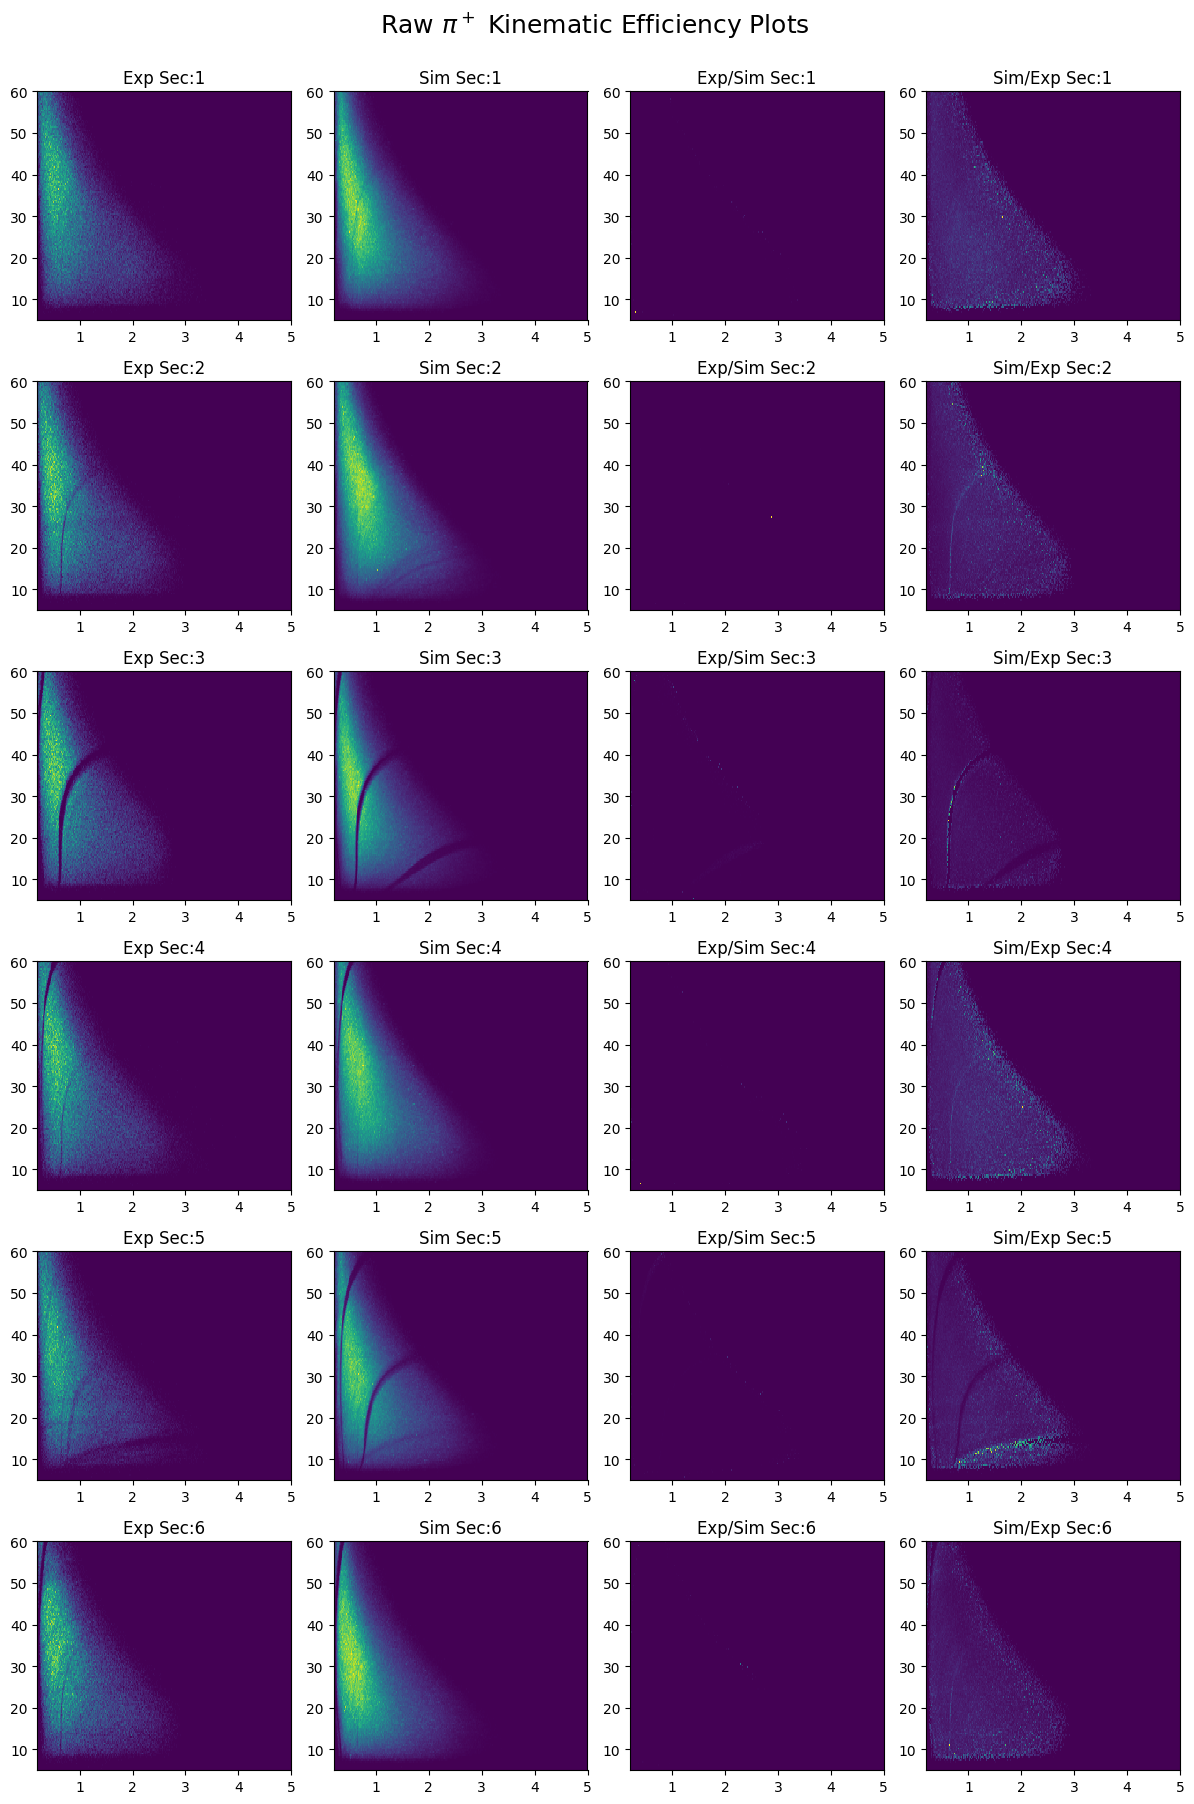

In [17]:

figure, axis = plt.subplots(6,4)
figure.set_size_inches(12,18)
figure.suptitle("Raw {} Kinematic Efficiency Plots".format(Particle),x=0.5,y=1.0,size=18)
for sec in range(6):
    axis[sec,0].pcolormesh(x,y,exp_z_yx[sec])
    axis[sec,0].set_title("Exp Sec:{}".format(sec+1))
    axis[sec,0].set_xlim((0.2,5))
    axis[sec,0].set_ylim((5,60))
    #axis[sec,0].colorbar(pcolormesh(x,y,xs_z_yx[sec]))
    axis[sec,1].pcolormesh(x,y,sim_z_yx[sec])
    axis[sec,1].set_title("Sim Sec:{}".format(sec+1))
    axis[sec,1].set_xlim((0.2,5))
    axis[sec,1].set_ylim((5,60))
    #axis[sec,1].colorbar()
    axis[sec,2].pcolormesh(x,y,xr_z_yx[sec])
    axis[sec,2].set_title("Exp/Sim Sec:{}".format(sec+1))
    axis[sec,2].set_xlim((0.2,5))
    axis[sec,2].set_ylim((5,60))
    #axis[sec,2].colorbar()
    axis[sec,3].pcolormesh(x,y,rx_z_yx[sec])
    axis[sec,3].set_title("Sim/Exp Sec:{}".format(sec+1))
    axis[sec,3].set_xlim((0.2,5))
    axis[sec,3].set_ylim((5,60))
    #axis[sec,3].colorbar()
#plt.colorbar()
plt.tight_layout()
plt.show()

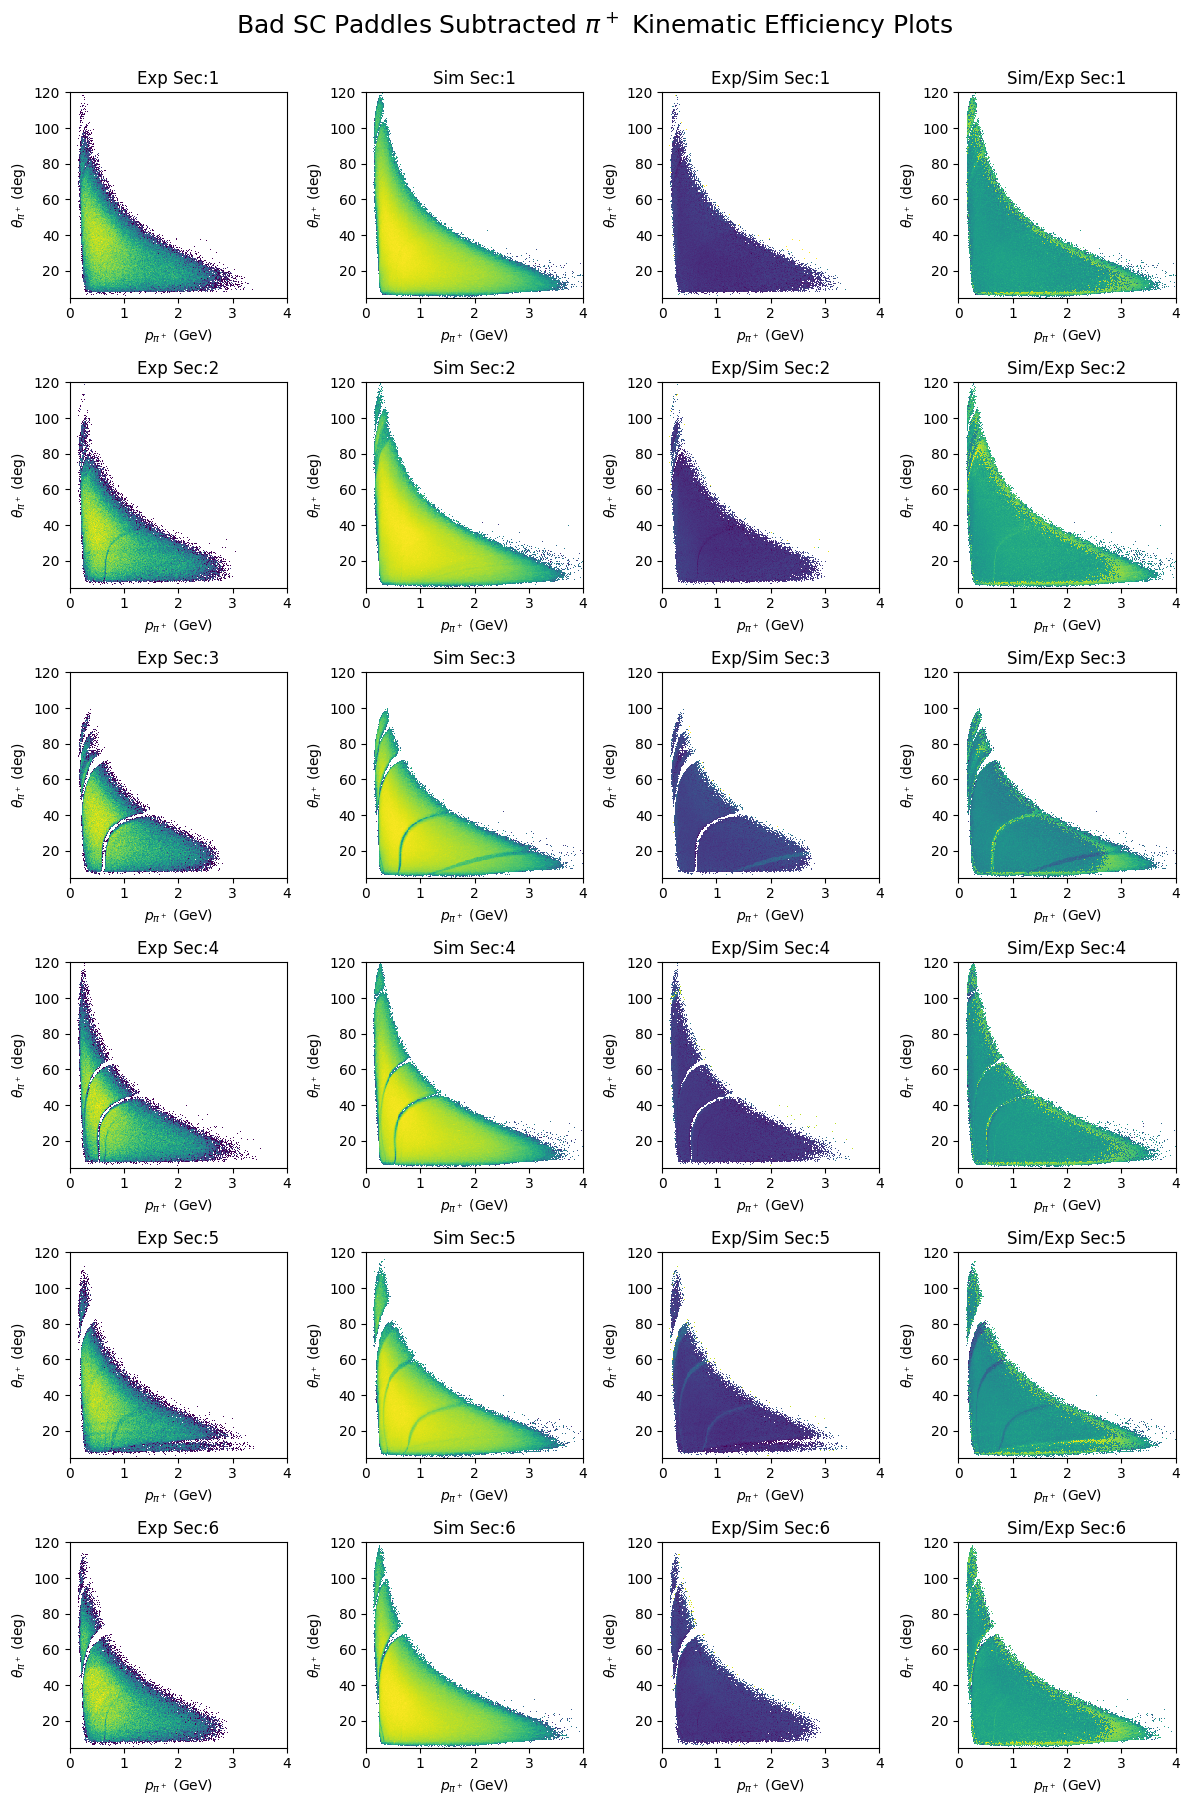

In [22]:
figure, axis = plt.subplots(6,4)
figure.set_size_inches(12,18)
figure.suptitle("Bad SC Paddles Subtracted {} Kinematic Efficiency Plots".format(Particle),x=0.5,y=1.0,size=18)
for sec in range(6):
    axis[sec,0].pcolormesh(x,y,xs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xs[sec],vmax=xs_z_yx[sec].max()))
    axis[sec,0].set_title("Exp Sec:{}".format(sec+1))
    axis[sec,0].set_xlim((0.0,4))
    axis[sec,0].set_ylim((5,120))
    axis[sec,0].set_ylabel("{} (deg)".format(Theta))
    axis[sec,0].set_xlabel("{} (GeV)".format(Momentum))
    #axis[sec,0].colorbar(pcolormesh(x,y,xs_z_yx[sec]))
    axis[sec,1].pcolormesh(x,y,rs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rs[sec],vmax=rs_z_yx[sec].max()))
    axis[sec,1].set_title("Sim Sec:{}".format(sec+1))
    axis[sec,1].set_xlim((0.0,4))
    axis[sec,1].set_ylim((5,120))
    axis[sec,1].set_ylabel("{} (deg)".format(Theta))
    axis[sec,1].set_xlabel("{} (GeV)".format(Momentum))
    #axis[sec,1].colorbar(
    axis[sec,2].pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
    axis[sec,2].set_title("Exp/Sim Sec:{}".format(sec+1))
    axis[sec,2].set_xlim((0.0,4))
    axis[sec,2].set_ylim((5,120))
    axis[sec,2].set_ylabel("{} (deg)".format(Theta))
    axis[sec,2].set_xlabel("{} (GeV)".format(Momentum))
    #axis[sec,2].colorbar()
    axis[sec,3].pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
#     axis[sec,3].pcolormesh(x,y,rxs_z_yx[sec])
    axis[sec,3].set_title("Sim/Exp Sec:{}".format(sec+1))
    axis[sec,3].set_xlim((0.0,4))
    axis[sec,3].set_ylim((5,120))
    axis[sec,3].set_ylabel("{} (deg)".format(Theta))
    axis[sec,3].set_xlabel("{} (GeV)".format(Momentum))
    #axis[sec,3].colorbar()
#plt.colorbar()
plt.tight_layout()
plt.show()

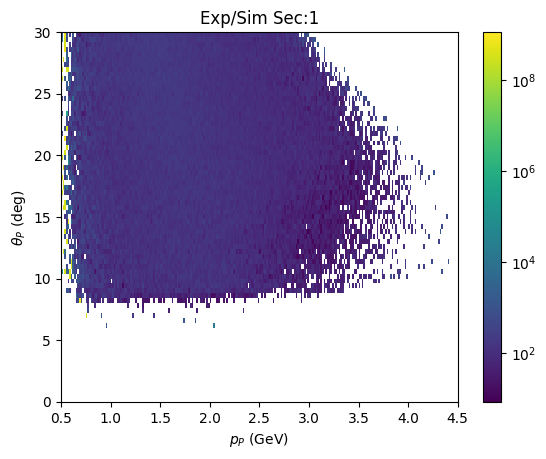

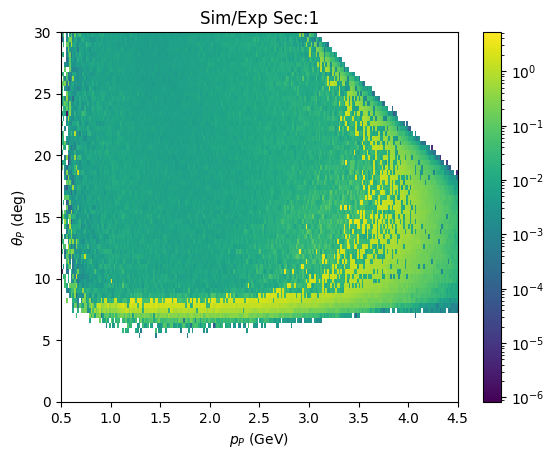

In [32]:
#Sector 1 Cuts
sec = 0

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((0.5,4.5))
plt.ylim((0.0,30))
plt.colorbar()
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
plt.xlim((0.5,4.5))
plt.ylim((0.0,30))
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.colorbar()
plt.show()

In [33]:
#Sector 1
sec = 0
xmerge1 = 4
ymerge1 = 1

x1 = Merge_Bins(xbins,xmerge1)
y1 = Merge_Bins(ybins,ymerge1)

xedges1 = Merge_Bin_Edges(XEdges_2d(xhist[0]),xmerge1)
yedges1 = Merge_Bin_Edges(YEdges_2d(xhist[0]),ymerge1)
xrs_z_xy1=Merge_Z(xrs_z_xy[sec],xmerge1,ymerge1) 
rxs_z_xy1=Merge_Z(rxs_z_xy[sec],xmerge1,ymerge1) 
xrs_z_yx1=Merge_Z(xrs_z_yx[sec],ymerge1,xmerge1) 
rxs_z_yx1=Merge_Z(rxs_z_yx[sec],ymerge1,xmerge1) 

In [34]:
def f1(x_, a_, b_, c_, d_):
    return a_ + b_*np.exp(c_*(x_-d_))

def f2(x_, a_, b_, c_, d_, e_):
    return a_ + b_*x_ + c_ * np.exp(d_*(x_-e_))

In [35]:
p0_1 = [7,0.01,4.43,1.73]
p0_2 = [51.25,-8.62,-2.17,4.54,3.35]
print(f2(3.0,51.25,-8.62,-2.17,4.54,3.35))
print(f2(3.0,*p0_2))
print(f2(3.0,p0_2[0],p0_2[1],p0_2[2],p0_2[3],p0_2[4]))

24.947038682626236
24.947038682626236
24.947038682626236


In [36]:
np.log(0.00001)

-11.512925464970229

In [37]:
def g1(x_, a_, b_, c_, d_, e_):
    out = []
    for i in range(len(x_)):
        if b_*(x_[i]-c_) > 0.0:
            out.append(a_ * np.log(b_*(x_[i]-c_))*np.exp(-d_*x_[i]) + e_)
        else:
            out.append(0.0)
    return out

def g2(x_, a_, b_, c_, d_):
    out = []
    for i in range(len(x_)):
        if b_*(x_[i]-c_) > 0.0:
            out.append(a_ * np.log(b_*(x_[i]-c_)) + d_)
        else:
            out.append(0.0)
    return out

In [38]:
def Linear(x_, a_, b_):
    return (a_ * x_) + b_

In [39]:
def h(y_, a_, b_, c_, d_, e_, f_):
    out = []
    for i in range(len(y_)):
        if b_*(y_[i]-c_) > 0.0:
            out.append(a_ * np.log(b_*((y_[i]**f_)-c_))*np.exp(-d_*(y_[i]**f_)) + e_)
        else:
            out.append(0.0)
    return out

def h_n(y_, a_, b_, c_, d_, e_, f_):
    if b_*(y_-c_) > 0.0:
        return a_ * np.log(b_*((y_**f_)-c_))*np.exp(-d_*(y_**f_)) + e_
    else:
        return 0.0

In [40]:
def sig1(y_, a_, b_, c_, d_, r_):
    return 1+(-1/(1 + np.exp(-r_ * (y_ - ((d_-b_)/(a_-c_))))))

def sig2(y_, a_, b_, c_, d_, r_):
    return 1/(1 + np.exp(-r_ * (y_ - ((d_-b_)/(a_-c_)))))

def sig3(y_, a_, b_, c_, d_, r_,s_):
    return 1+(-1/(1 + np.exp(-r_ * (y_ - ((d_-b_)/(a_-c_))-s_))))

def sig4(y_, a_, b_, c_, d_, r_,s_):
    return 1/(1 + np.exp(-r_ * (y_ - ((d_-b_)/(a_-c_))+s_)))

def g_n(y_, a_, b_, c_, d_, r1_,r2_, s1_,s2_, m_):
    if a_ == c_:
        return 0.0
    else:
        return sig1(y_, a_, b_, c_, d_, r1_)*Linear(y_,a_,b_) +  sig2(y_, a_, b_, c_, d_, r2_)*Linear(y_,c_,d_)- m_*sig3(y_, a_, b_, c_, d_, r1_,s1_)*sig4(y_, a_, b_, c_, d_, r2_,s2_)

def g(y_, a_, b_, c_, d_, r1_,r2_, s1_,s2_ ,m_):
    out = []
    for i in range(len(y_)):
        out.append(g_n(y_[i], a_, b_, c_, d_, r1_,r2_, s1_,s2_, m_))
    return out



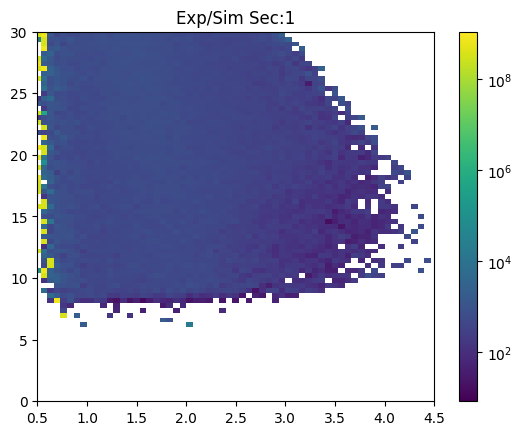

/var/folders/9h/zwsh0vf94zxdp3tw1qp_dcjw0000gn/T/ipykernel_82436/3256727128.py:5: RuntimeWarning: invalid value encountered in log
  out.append(a_ * np.log(b_*((y_[i]**f_)-c_))*np.exp(-d_*(y_[i]**f_)) + e_)


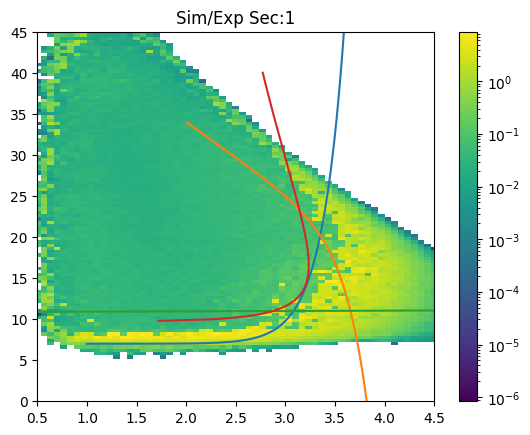

In [41]:
sec = 0

min_pars1_2 = [0.7,50.3,4.8,0.1,1.6,0.69]
 
plt.pcolormesh(x1,y1,xrs_z_yx1,norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx1.max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((0.5,4.5))
plt.ylim((0.0,30))
plt.colorbar()
plt.show()

cont_x1 = np.linspace(1.0,4.0,200)
cont_x2 = np.linspace(2.0,4.0,200)
cont_y = np.linspace(4.0,40.0,200)

plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
plt.plot(cont_x1,f1(cont_x1,*p0_1))
plt.plot(cont_x2,f2(cont_x2,*p0_2))
plt.plot(g1(cont_y,0.5,1.0,10.9,0.067,5),cont_y)
        #         a.   b.  c. d.      e. f
plt.plot(h(cont_y,*min_pars1_2),cont_y)
#print(g1(cont_y,10.4,1.0,10.9,0.067,13))
plt.xlim((0.5,4.5))
plt.ylim((0.0,45))
plt.colorbar()
plt.show()

In [42]:
# #just one set of cuts needed for sector 1
# f1x = []
# f1y = []

# for xbin in range(len(x1)):
#     if x1[xbin] > 0.0 and x1[xbin] < 2.5:
#         for ybin in range(len(y1)):
#             if y1[ybin] > 0.0 and y1[ybin] < 10.0:
# #                 if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
# #                     if rxs_z_yx1[ybin].max() > 0.0:
# #                         f1x.append(x1[xbin])
# #                         f1y.append(y1[ybin])
#                 if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
#                     if rxs_z_xy1[xbin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])


# for ybin in range(len(y1)):
#     if y1[ybin] > 5.0 and y1[ybin] < 15:
#         for xbin in range(len(x1)):
#             if x1[xbin] >= 2.5 and x1[xbin] < h_n(y1[ybin],*min_pars1_2):
# #                 if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
# #                     if rxs_z_yx1[ybin].max() > 0.0:
# #                         f1x.append(x1[xbin])
# #                         f1y.append(y1[ybin])
#                 if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
#                     if rxs_z_xy1[xbin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])
                        
# par01, par01_cov = op.curve_fit(Linear,f1x,f1y,p0=[0.0,7])
# print(par01)
                        
# for ybin in range(len(y1)):
#     if y1[ybin] > 15 and y1[ybin] < 35:
#         for xbin in range(len(x1)):
#             if x1[xbin] > h_n(y1[ybin],*min_pars1_2):
#                 if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
#                     if rxs_z_yx1[ybin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])
# #                 if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
# #                     if rxs_z_xy1[xbin].max() > 0.0:
# #                         f1x.append(x1[xbin])
# #                         f1y.append(y1[ybin])
# plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
# plt.scatter(f1x,f1y)
# plt.xlim((0.0,4.3))
# plt.ylim((5,35))
# plt.show()


2.833333333333333


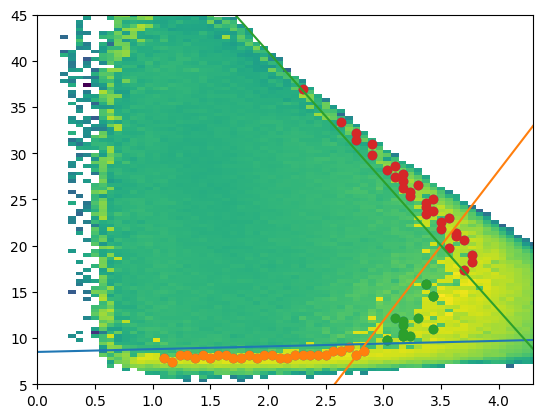

In [43]:
pars0_1 = [0.3,8.5]
pars0_2 = [16.25,-36.875]
pars0_3 = [-14,69]
f1x = []
f1y = []

#just one set of cuts needed for sector 1
f1x1 = []
f1y1 = []

f1x2 = []
f1y2 = []

f1x3 = []
f1y3 = []

for xbin in range(len(x1)):
    if x1[xbin] > 1.0 and x1[xbin] < 3.0:
        for ybin in range(len(y1)):
            if y1[ybin] > 0.0 and y1[ybin] < Linear(x1[xbin],*pars0_1):
#                 if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
#                     if rxs_z_yx1[ybin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])
                if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
                    if rxs_z_xy1[xbin].max() > 0.0:
                        f1x.append(x1[xbin])
                        f1y.append(y1[ybin])
                        f1x1.append(x1[xbin])
                        f1y1.append(y1[ybin])
                        
sec1_step1 = np.max(f1x)
print(sec1_step1)


for xbin in range(len(x1)):
    if x1[xbin] > sec1_step1 and x1[xbin] < 3.5:
        for ybin in range(len(y1)):
            if y1[ybin] > 0.0 and y1[ybin] < Linear(x1[xbin],*pars0_2):
                if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
                    if rxs_z_yx1[ybin].max() > 0.0:
                        f1x.append(x1[xbin])
                        f1y.append(y1[ybin])
                        f1x2.append(x1[xbin])
                        f1y2.append(y1[ybin])
                if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
                    if rxs_z_xy1[xbin].max() > 0.0:
                        f1x.append(x1[xbin])
                        f1y.append(y1[ybin])
                        f1x2.append(x1[xbin])
                        f1y2.append(y1[ybin])
                        
                        
for ybin in range(len(y1)):
    if y1[ybin] > 17 and y1[ybin] < 40:
        for xbin in range(len(x1)):
            if y1[ybin] > Linear(x1[xbin],*pars0_3) and x1[xbin]>1.5:
                if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
                    if rxs_z_yx1[ybin].max() > 0.0:
                        f1x.append(x1[xbin])
                        f1y.append(y1[ybin])
                        f1x3.append(x1[xbin])
                        f1y3.append(y1[ybin])
#                 if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
#                     if rxs_z_xy1[xbin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])
plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
plt.plot(cont_x,Linear(cont_x,*pars0_1))
plt.plot(cont_x,Linear(cont_x,*pars0_2))
plt.plot(cont_x,Linear(cont_x,*pars0_3))
plt.scatter(f1x,f1y)
plt.scatter(f1x1,f1y1)
plt.scatter(f1x2,f1y2)
plt.scatter(f1x3,f1y3)
plt.xlim((0.0,4.3))
plt.ylim((5,45))
plt.show()

[0.40293041 7.33349611]
[ 11.10381357 -23.9383475 ]
[-12.84392698  67.43870351]


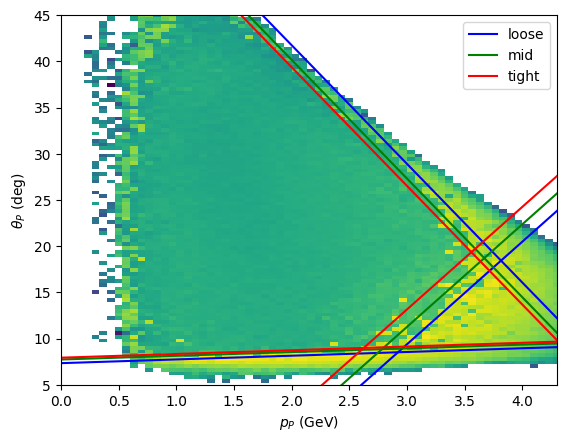

{{ 0.40293041323104745 , 7.924973208741588 },
{ 0.40293041323104745 , 7.727814176938147 },
{ 0.40293041323104745 , 7.333496113331264 }}
{{ 11.103813573309115 , -20.168669217365036 },
{ 11.103813573309115 , -22.053508360139602 },
{ 11.103813573309115 , -23.938347502914173 }}
{{ -12.843926975259832 , 65.05447914340589 },
{ -12.843926975259832 , 65.84922059975742 },
{ -12.843926975259832 , 67.43870351246048 }}


In [58]:
fit_pars01, fit_pars01_cov = op.curve_fit(Linear,f1x1,f1y1,p0=pars0_1,maxfev=5000)
fit_pars02, fit_pars02_cov = op.curve_fit(Linear,f1x2,f1y2,p0=pars0_2,maxfev=5000)
fit_pars03, fit_pars03_cov = op.curve_fit(Linear,f1x3,f1y3,p0=pars0_3,maxfev=5000)

print(fit_pars01)
print(fit_pars02)
print(fit_pars03)

plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
plt.plot(cont_x,Linear(cont_x,*fit_pars01),color='b',label='loose')
plt.plot(cont_x,Linear(cont_x,*fit_pars02),color='b')
plt.plot(cont_x,Linear(cont_x,*fit_pars03),color='b')

plt.plot(cont_x,Linear(cont_x,fit_pars01[0],fit_pars01[1] + 2.0*np.sqrt(fit_pars01_cov[1][1])),color='g',label='mid')
plt.plot(cont_x,Linear(cont_x,fit_pars02[0],fit_pars02[1] + 0.2*np.sqrt(fit_pars02_cov[1][1])),color='g')
plt.plot(cont_x,Linear(cont_x,fit_pars03[0],fit_pars03[1] - np.sqrt(fit_pars03_cov[1][1])),color='g')

plt.plot(cont_x,Linear(cont_x,fit_pars01[0],fit_pars01[1] + 3.0*np.sqrt(fit_pars01_cov[1][1])),color='r',label='tight')
plt.plot(cont_x,Linear(cont_x,fit_pars02[0],fit_pars02[1] + 0.4*np.sqrt(fit_pars02_cov[1][1])),color='r')
plt.plot(cont_x,Linear(cont_x,fit_pars03[0],fit_pars03[1] - 1.5*np.sqrt(fit_pars03_cov[1][1])),color='r')

plt.xlim((0.0,4.3))
plt.ylim((5,45))
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.legend()
plt.show()

print("{{",fit_pars01[0],",",fit_pars01[1] + 3.0*np.sqrt(fit_pars01_cov[1][1]),"},")
print("{",fit_pars01[0],",",fit_pars01[1] + 2.0*np.sqrt(fit_pars01_cov[1][1]),"},")
print("{",fit_pars01[0],",",fit_pars01[1],"}}")

print("{{",fit_pars02[0],",",fit_pars02[1] +0.4*np.sqrt(fit_pars02_cov[1][1]),"},")
print("{",fit_pars02[0],",",fit_pars02[1] + 0.2*np.sqrt(fit_pars02_cov[1][1]),"},")
print("{",fit_pars02[0],",",fit_pars02[1],"}}")


print("{{",fit_pars03[0],",",fit_pars03[1] -1.5*np.sqrt(fit_pars03_cov[1][1]),"},")
print("{",fit_pars03[0],",",fit_pars03[1] - np.sqrt(fit_pars03_cov[1][1]),"},")
print("{",fit_pars03[0],",",fit_pars03[1],"}}")



In [45]:
def fit_func1(x_,a_,b_,c_,d_):
    return a_ * np.log(b_ * (x_ - c_)) + d_

def fit_func1_mod(x_,a_,b_,c_,d_):
    out = []
    for i in range(len(x_)):
        out.append(fit_func1(x_[i],a_,b_,c_,d_))
    return out



In [46]:
def Gaus_Shift(xarray_,yarray_,sig_,nsig_,side_):
    out = []
    for i in range(len(xarray_)):
        out.append(yarray_[i]+side_*nsig_*sig_)
    return out



cols = ['r','g','b']
cut_name = ['tight',"mid","loose"]
side_val = [-1,1]
cut_width = [3.5,3,2.5]


In [47]:
sig = 0.1

cols = ['r','g','b']
cut_name = ['tight',"mid","loose"]
side_val = [-1,1]
cut_width = [3.5,3,2.5]

# plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
# plt.plot(cont_x,fit_func2(cont_x,*pars1_f2))
# for cut in range(3):
#     plt.plot(cont_x,Gaus_Shift(cont_x,fit_func2(cont_x,*pars1_f2),sig,cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
#     plt.plot(cont_x,Gaus_Shift(cont_x,fit_func2(cont_x,*pars1_f2),sig,cut_width[cut],1),color=cols[cut])
# plt.xlim((2.0,4.3))
# plt.ylim((15,25))
# plt.legend()
# plt.show()

In [48]:
def Integrate(zvals_):
    output = 0.0
    for bin1 in range(len(zvals_)):
        for bin2 in range(len(zvals_[0])):
            output += zvals_[bin1][bin2]
    return output

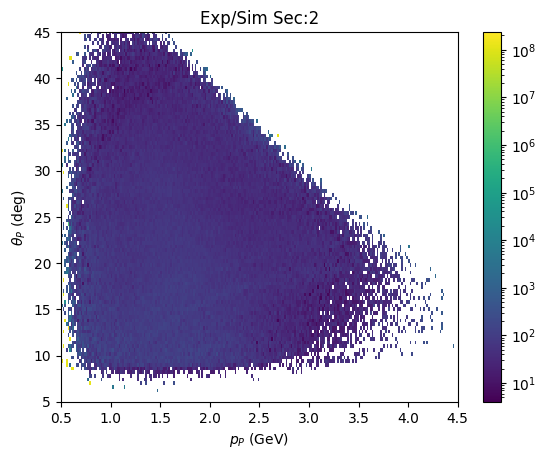

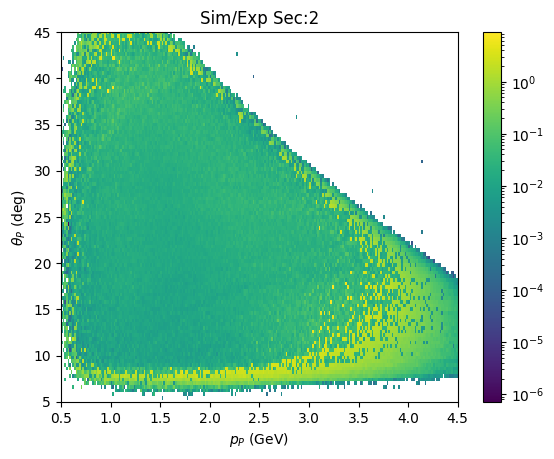

In [49]:
#Sector 2 Cuts
sec = 1

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((0.5,4.5))
plt.ylim((5,45))
plt.colorbar()
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
plt.xlim((0.5,4.5))
plt.ylim((5,45))
plt.colorbar()
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()

In [50]:
#Sector 2
sec = 1
xmerge2 = 4
ymerge2 = 1

x2 = Merge_Bins(xbins,xmerge2)
y2 = Merge_Bins(ybins,ymerge2)

xedges2 = Merge_Bin_Edges(XEdges_2d(xhist[0]),xmerge2)
yedges2 = Merge_Bin_Edges(YEdges_2d(xhist[0]),ymerge2)
xrs_z_xy2=Merge_Z(xrs_z_xy[sec],xmerge2,ymerge2) 
rxs_z_xy2=Merge_Z(rxs_z_xy[sec],xmerge2,ymerge2) 
xrs_z_yx2=Merge_Z(xrs_z_yx[sec],ymerge2,xmerge2) 
rxs_z_yx2=Merge_Z(rxs_z_yx[sec],ymerge2,xmerge2) 

2.9000000000000004


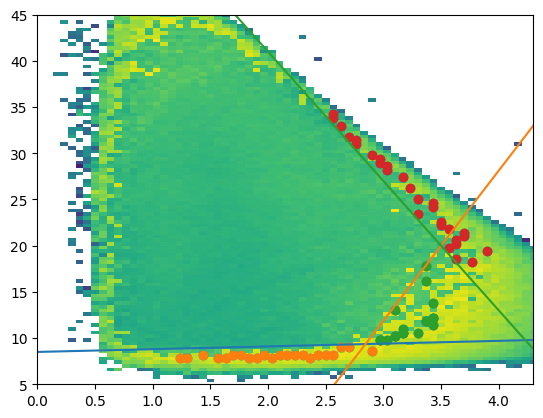

In [68]:
pars1_1 = [0.3,8.5]
pars1_2 = [16.25,-36.875]
pars1_3 = [-14,69]
f2x = []
f2y = []

#just one set of cuts needed for sector 1
f2x1 = []
f2y1 = []

f2x2 = []
f2y2 = []

f2x3 = []
f2y3 = []

for xbin in range(len(x2)):
    if x2[xbin] > 1.0 and x2[xbin] < 3.0:
        for ybin in range(len(y2)):
            if y2[ybin] > 0.0 and y2[ybin] < Linear(x2[xbin],*pars1_1):
#                 if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
#                     if rxs_z_yx1[ybin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])
                if rxs_z_xy2[xbin][ybin] == rxs_z_xy2[xbin].max():
                    if rxs_z_xy2[xbin].max() > 0.0:
                        f2x.append(x2[xbin])
                        f2y.append(y2[ybin])
                        f2x1.append(x2[xbin])
                        f2y1.append(y2[ybin])
                        
sec2_step1 = np.max(f2x)
print(sec2_step1)


for xbin in range(len(x2)):
    if x2[xbin] > sec2_step1 and x2[xbin] < 3.5:
        for ybin in range(len(y2)):
            if y2[ybin] > 0.0 and y2[ybin] < Linear(x2[xbin],*pars1_2):
                if rxs_z_yx2[ybin][xbin] == rxs_z_yx2[ybin].max():
                    if rxs_z_yx2[ybin].max() > 0.0:
                        f2x.append(x2[xbin])
                        f2y.append(y2[ybin])
                        f2x2.append(x2[xbin])
                        f2y2.append(y2[ybin])
                if rxs_z_xy2[xbin][ybin] == rxs_z_xy2[xbin].max():
                    if rxs_z_xy2[xbin].max() > 0.0:
                        f2x.append(x1[xbin])
                        f2y.append(y1[ybin])
                        f2x2.append(x1[xbin])
                        f2y2.append(y1[ybin])
                        
                        
for ybin in range(len(y2)):
    if y2[ybin] > 17 and y2[ybin] < 40:
        for xbin in range(len(x2)):
            if y2[ybin] > Linear(x2[xbin],*pars1_3) and x2[xbin]>1.5:
                if rxs_z_yx2[ybin][xbin] == rxs_z_yx2[ybin].max():
                    if rxs_z_yx2[ybin].max() > 0.0:
                        f2x.append(x2[xbin])
                        f2y.append(y2[ybin])
                        f2x3.append(x2[xbin])
                        f2y3.append(y2[ybin])
#                 if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
#                     if rxs_z_xy1[xbin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])
plt.pcolormesh(x2,y2,rxs_z_yx2,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx2.max()))
plt.plot(cont_x,Linear(cont_x,*pars1_1))
plt.plot(cont_x,Linear(cont_x,*pars1_2))
plt.plot(cont_x,Linear(cont_x,*pars1_3))
plt.scatter(f2x,f2y)
plt.scatter(f2x1,f2y1)
plt.scatter(f2x2,f2y2)
plt.scatter(f2x3,f2y3)
plt.xlim((0.0,4.3))
plt.ylim((5,45))
plt.show()

[0.50964238 7.09682675]
[  7.70729228 -13.12656833]
[-12.14717023  65.02045958]


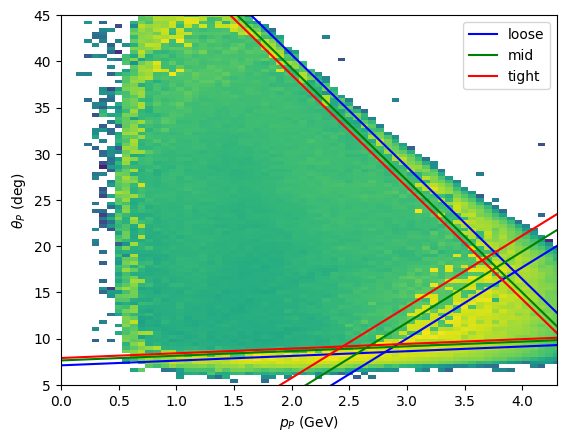

{{ 0.5096423768425183 , 7.891915250782641 },
{ 0.5096423768425183 , 7.626885749131792 },
{ 0.5096423768425183 , 7.096826745830093 }}
{{ 7.70729227612612 , -9.685096128340405 },
{ 7.70729227612612 , -11.40583222960396 },
{ 7.70729227612612 , -13.126568330867512 }}
{{ -12.147170230429042 , 62.82870513087054 },
{ -12.147170230429042 , 63.55928994762384 },
{ -12.147170230429042 , 65.02045958113044 }}


In [69]:
fit_pars11, fit_pars11_cov = op.curve_fit(Linear,f2x1,f2y1,p0=pars1_1,maxfev=5000)
fit_pars12, fit_pars12_cov = op.curve_fit(Linear,f2x2,f2y2,p0=pars1_2,maxfev=5000)
fit_pars13, fit_pars13_cov = op.curve_fit(Linear,f2x3,f2y3,p0=pars1_3,maxfev=5000)

print(fit_pars11)
print(fit_pars12)
print(fit_pars13)

plt.pcolormesh(x2,y2,rxs_z_yx2,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx2.max()))
plt.plot(cont_x,Linear(cont_x,*fit_pars11),color='b',label='loose')
plt.plot(cont_x,Linear(cont_x,*fit_pars12),color='b')
plt.plot(cont_x,Linear(cont_x,*fit_pars13),color='b')

plt.plot(cont_x,Linear(cont_x,fit_pars11[0],fit_pars11[1] + 2.0*np.sqrt(fit_pars11_cov[1][1])),color='g',label='mid')
plt.plot(cont_x,Linear(cont_x,fit_pars12[0],fit_pars12[1] + 0.2*np.sqrt(fit_pars12_cov[1][1])),color='g')
plt.plot(cont_x,Linear(cont_x,fit_pars13[0],fit_pars13[1] - np.sqrt(fit_pars13_cov[1][1])),color='g')

plt.plot(cont_x,Linear(cont_x,fit_pars11[0],fit_pars11[1] + 3.0*np.sqrt(fit_pars11_cov[1][1])),color='r',label='tight')
plt.plot(cont_x,Linear(cont_x,fit_pars12[0],fit_pars12[1] + 0.4*np.sqrt(fit_pars12_cov[1][1])),color='r')
plt.plot(cont_x,Linear(cont_x,fit_pars13[0],fit_pars13[1] - 1.5*np.sqrt(fit_pars13_cov[1][1])),color='r')

plt.xlim((0.0,4.3))
plt.ylim((5,45))
plt.legend()
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()

print("{{",fit_pars11[0],",",fit_pars11[1] + 3.0*np.sqrt(fit_pars11_cov[1][1]),"},")
print("{",fit_pars11[0],",",fit_pars11[1] + 2.0*np.sqrt(fit_pars11_cov[1][1]),"},")
print("{",fit_pars11[0],",",fit_pars11[1],"}}")

print("{{",fit_pars12[0],",",fit_pars12[1] +0.4*np.sqrt(fit_pars12_cov[1][1]),"},")
print("{",fit_pars12[0],",",fit_pars12[1] + 0.2*np.sqrt(fit_pars12_cov[1][1]),"},")
print("{",fit_pars12[0],",",fit_pars12[1],"}}")


print("{{",fit_pars13[0],",",fit_pars13[1] -1.5*np.sqrt(fit_pars13_cov[1][1]),"},")
print("{",fit_pars13[0],",",fit_pars13[1] - np.sqrt(fit_pars13_cov[1][1]),"},")
print("{",fit_pars13[0],",",fit_pars13[1],"}}")

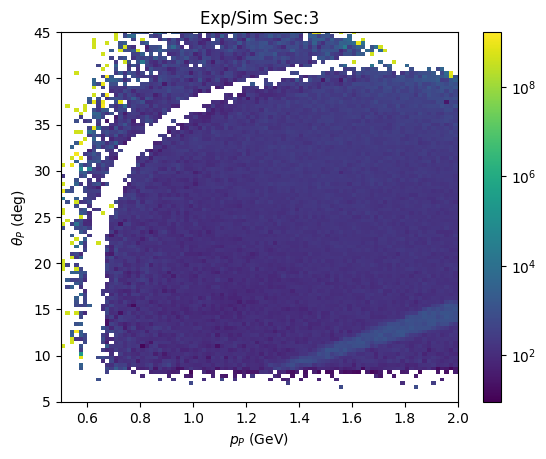

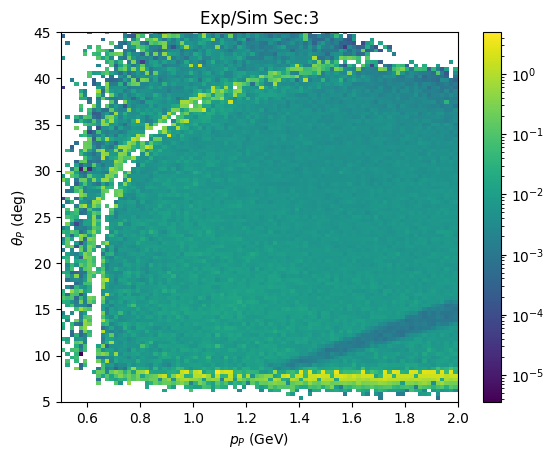

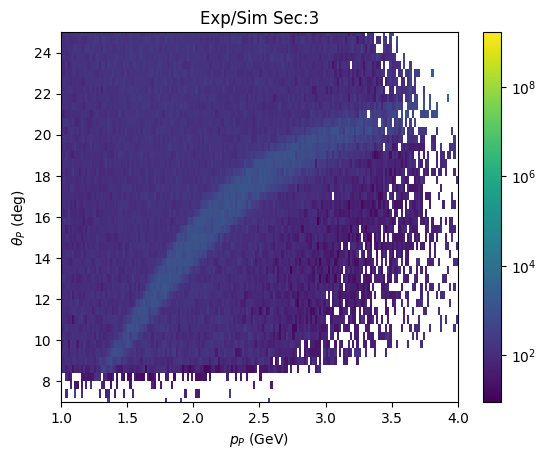

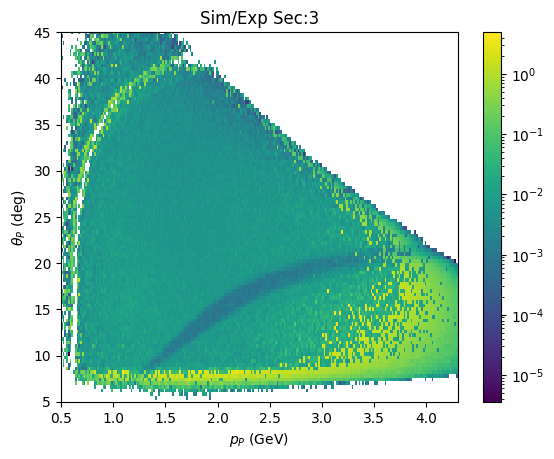

In [70]:
#Sector 3 Cuts
sec = 2

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((0.5,2))
plt.ylim((5,45))
plt.colorbar()
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((0.5,2))
plt.ylim((5,45))
plt.colorbar()
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((1,4.0))
plt.ylim((7,25))
plt.colorbar()
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
plt.xlim((0.5,4.3))
plt.ylim((5,45))
plt.colorbar()
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()

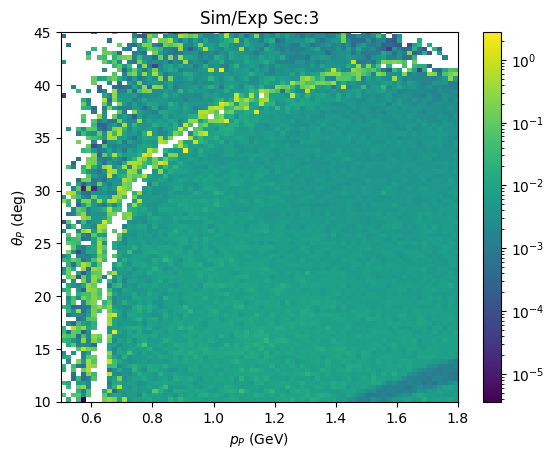

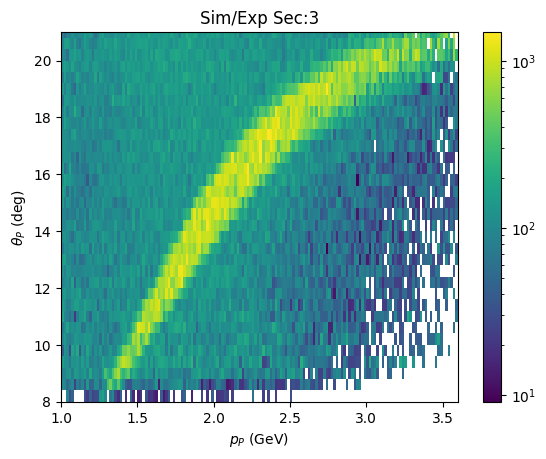

In [71]:
#Need three cuts

#Sector 3
# sec = 2
# xmerge3 = 2
# ymerge3 = 1

# x3 = Merge_Bins(xbins,xmerge3)
# y3 = Merge_Bins(ybins,ymerge3)

# xedges3 = Merge_Bin_Edges(XEdges_2d(xhist[0]),xmerge3)
# yedges3 = Merge_Bin_Edges(YEdges_2d(xhist[0]),ymerge3)
# xrs_z_xy3=Merge_Z(xrs_z_xy[sec],xmerge3,ymerge3) 
# rxs_z_xy3=Merge_Z(rxs_z_xy[sec],xmerge3,ymerge3) 
# xrs_z_yx3=Merge_Z(xrs_z_yx[sec],ymerge3,xmerge3) 
# rxs_z_yx3=Merge_Z(rxs_z_yx[sec],ymerge3,xmerge3) 

# plt.pcolormesh(x3,y3,rxs_z_yx3,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx3.max()))
# plt.title("Exp/Sim Sec:{}".format(sec+1))
# plt.xlim((0.5,2))
# plt.ylim((5,45))
# plt.colorbar()


# s3_c1_g1_par = [23.6,-7.14]
# plt.plot(cont_x,Linear(cont_x,*s3_c1_g1_par))

# plt.show()

# x3_c1 = []
# y3_c1 = []




sec=2
xbou3 = [[0.5,1.8],[1.0,3.6]]
ybou3 = [[10,45],[8,21]]
x3 = [Bounds_on_Y(x,xbou3[0][0],xbou3[0][1]),Bounds_on_Y(x,xbou3[1][0],xbou3[1][1])]
y3 = [Bounds_on_Y(y,ybou3[0][0],ybou3[0][1]),Bounds_on_Y(y,ybou3[1][0],ybou3[1][1])]
z_xy3 = [Bounds_on_Z_XY(rxs_z_xy[sec],x,y,xbou3[0][0],xbou3[0][1],ybou3[0][0],ybou3[0][1]),Bounds_on_Z_XY(xrs_z_xy[sec],x,y,xbou3[1][0],xbou3[1][1],ybou3[1][0],ybou3[1][1])]
z_yx3 = [Bounds_on_Z_YX(rxs_z_yx[sec],x,y,xbou3[0][0],xbou3[0][1],ybou3[0][0],ybou3[0][1]),Bounds_on_Z_YX(xrs_z_yx[sec],x,y,xbou3[1][0],xbou3[1][1],ybou3[1][0],ybou3[1][1])]


for i in range(2):
    plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    plt.title("Sim/Exp Sec:{}".format(sec+1))
    plt.xlim((xbou3[i][0],xbou3[i][1]))
    plt.ylim((ybou3[i][0],ybou3[i][1]))
    plt.colorbar()
    plt.ylabel("{} (deg)".format(Theta))
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.show()


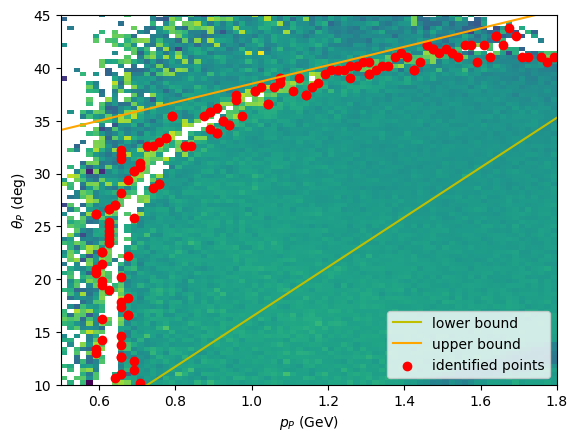

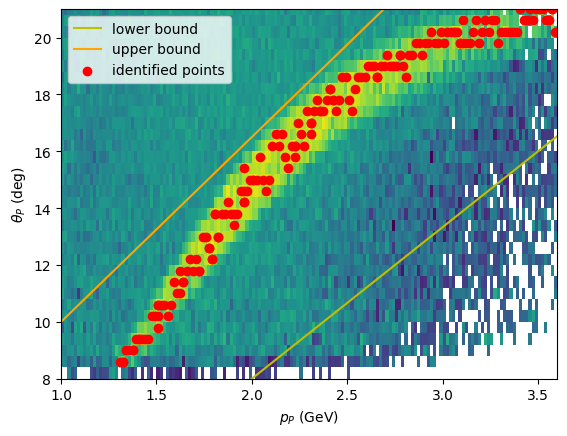

In [72]:
f3x = [[],[]]
f3y = [[],[]]

slice_pars  = [[[23.57,-7.142],[8.75,29.75]],[[5.33,-2.66],[6.5,3.5]]]

for s in range(2):
    for xbin in range(len(x3[s])):
        for ybin in range(len(y3[s])):
             if y3[s][ybin] > Linear(x3[s][xbin],slice_pars[s][0][0],slice_pars[s][0][1]) and y3[s][ybin] < Linear(x3[s][xbin],slice_pars[s][1][0],slice_pars[s][1][1]):
                if x3[s][xbin] > 0.58:
                    if s == 0:
                        if z_xy3[s][xbin][ybin] == z_xy3[s][xbin].max() and z_xy3[s][xbin][ybin]>0.0:
                            f3x[s].append(x3[s][xbin])
                            f3y[s].append(y3[s][ybin])
                        if z_yx3[s][ybin][xbin] == z_yx3[s][ybin].max() and z_yx3[s][ybin][xbin]>0.0:
                            f3x[s].append(x3[s][xbin])
                            f3y[s].append(y3[s][ybin])
                    elif x3[s][xbin] > 1.3:
                        if z_xy3[s][xbin][ybin] == z_xy3[s][xbin].max() and z_xy3[s][xbin][ybin]>0.0:
                            f3x[s].append(x3[s][xbin])
                            f3y[s].append(y3[s][ybin])
                        if z_yx3[s][ybin][xbin] == z_yx3[s][ybin].max() and z_yx3[s][ybin][xbin]>0.0:
                            f3x[s].append(x3[s][xbin])
                            f3y[s].append(y3[s][ybin])
                
for i in range(2):
    plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    plt.plot(cont_x,Linear(cont_x,slice_pars[i][0][0],slice_pars[i][0][1]),color='y',label='lower bound')
    plt.plot(cont_x,Linear(cont_x,slice_pars[i][1][0],slice_pars[i][1][1]),color='orange',label='upper bound')
    
    #plt.plot(cont_x,Linear(cont_x,26,-1.84))
    #plt.plot(cont_x,Linear(cont_x,27.5,-1.84))
    plt.scatter(f3x[i],f3y[i],color='r',label='identified points')
    plt.xlim((xbou3[i][0],xbou3[i][1]))
    plt.ylim((ybou3[i][0],ybou3[i][1]))
    plt.ylabel("{} (deg)".format(Theta))
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.legend()
    plt.show()

In [73]:
def fit_func2(x_, a_, b_, c_, d_, e_):
    return a_ * np.log(b_ * (x_ - c_)**1./d_) + e_

def fit_func3(x_, a_, b_, c_, d_):
    return a_ * (x_ -b_)**(1./c_) + d_

def inv_fit_func3(y_, a_, b_, c_, d_):
    return b_ + (-(d_ - y_)/a_)**c_
    #     out = []
#     for i in range(len(x_)):
#         try:
#             out.append(a_ * (x_[i] -b_)**c_ + d_)
#         except RuntimeWarning:
#             out.append(d_)
#     return out

NameError: name 'cont_x3' is not defined

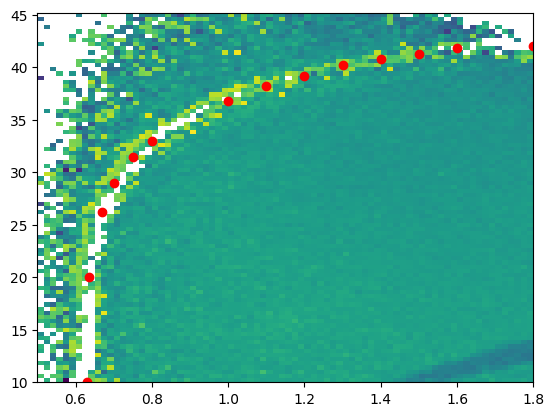

In [74]:
i = 0
p03_f3_r1 = [42,0.63,8.5,0]

f3x_r1 = [0.63,0.635,0.67,0.7,0.75,0.8,1.0,1.2,1.4,1.6,1.8,1.5,1.3,1.1]
f3y_r1 = [10,20,26.2,29,31.5,33,36.8,39.2,40.8,41.8,42,41.3,40.2,38.2]

cont_y = np.linspace(10,45,200)

bounds3 = [[0.0,0.0,1.0,-np.inf],[np.inf,np.inf,np.inf,np.inf]]

#pars30_f3, pars_cov30_f3 = op.curve_fit(fit_func3,f3x_r1,f3y_r1,p0=p03_f3_r1,maxfev=5000,bounds=bounds3)

pars30_f3, pars_cov30_f3 = op.curve_fit(inv_fit_func3,f3y_r1,f3x_r1,p0=p03_f3_r1,maxfev=5000,bounds=bounds3)


plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
plt.scatter(f3x_r1,f3y_r1,color='r')
#plt.plot(cont_x3[i],fit_func3(cont_x3[i],*pars3_f3[i]),label='fit 3')
plt.plot(cont_x3[i],fit_func3(cont_x3[i],*p03_f3_r1),label='guess 3')
plt.plot(inv_fit_func3(cont_y,*pars30_f3),cont_y,label='fit 3')
plt.ylabel("{} (deg)".format(Theta))
plt.xlabel("{} (GeV)".format(Momentum))
plt.show()


In [82]:
p03_f1 = [[13.83926423,  8.22539621,  0.33290666, 10.82258806],[ 12.70746443,  24.27705717,   0.04506448, -34.39707362]]

p03_f2 = [[9.02,2.64,0.5,1.15,30.01],[9.02,2.64,0.5,1.15,30.01]]

# p03_f3 = [[42,0.5,0.06,0],[20,1.15,0.13,0]]

p03_f3 = [[42,0.63,8.5,0],[12.2743597 ,  1.30552928,  2.23886686,  4.40004994]]

cont_y3 = [np.linspace(10,45,200),np.linspace(7,25,200)]

pars30_f1, pars_cov30_f1 = op.curve_fit(fit_func1,f3x[0],f3y[0],p0=p03_f1[0])
pars30_f2, pars_cov30_f2 = op.curve_fit(fit_func2,f3x[0],f3y[0],p0=p03_f2[0])
pars30_f3, pars_cov30_f3 = op.curve_fit(inv_fit_func3,f3y[0],f3x[0],p0=p03_f3[0],maxfev=5000,bounds=bounds3)
#pars31_f1, pars_cov31_f1 = op.curve_fit(fit_func1,f3x[1],f3y[1],p0=p03_f1[1])
#pars31_f2, pars_cov31_f2 = op.curve_fit(fit_func2,f3x[1],f3y[1],p0=p03_f2[1])
pars31_f3, pars_cov31_f3 = op.curve_fit(inv_fit_func3,f3y[1],f3x[1],p0=p03_f3[1],maxfev=5000,bounds=bounds3)

pars3_f1 = [pars30_f1,pars31_f1]
pars3_f2 = [pars30_f2,pars31_f2]
pars3_f3 = [pars30_f3,pars31_f3]
cont_x3 = [np.linspace(xbou3[0][0],xbou3[0][1],200),np.linspace(xbou3[1][0],xbou3[1][1],200)]
plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
sec=2

#print(pars3_f1)
#print(pars3_f2)
print(pars3_f3)

def inv_f3_sig1(y_, s_, a_, b_, c_, d_):
    return inv_fit_func3(y_, a_-s_, b_+s_, c_, d_)
#+s_

def inv_f3_sig2(y_, s_, a_, b_, c_, d_):
    return inv_fit_func3(y_, a_+s_, b_-s_, c_, d_)
#-s_


sig3 = [[[0.06,0.06],[.04,0.04],[0.02,0.02]],[[0.3,0.3],[.2,0.2],[0.1,0.1]]]

cut_col = ['r','g','b']
cut_nam = ['tight','mid','loose']

for i in range(2):
    plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    #plt.plot(cont_x3[i],fit_func1(cont_x3[i],*pars3_f1[i]),label='fit 1')
    #plt.plot(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),label='fit 2')
    #plt.plot(cont_x3[i],fit_func3(cont_x3[i],*pars3_f3[i]),label='fit 3')
    plt.plot(inv_fit_func3(cont_y3[i],*pars3_f3[i]),cont_y3[i],label='fit 3',color='y')
    plt.plot(inv_fit_func3(cont_y3[i],*p03_f3[i]),cont_y3[i],label='g 3',color='orange')
    print("i=",i)
    for k in range(3):
        print(sig3[i][k])
        plt.plot(inv_f3_sig1(cont_y3[i],sig3[i][k][0],pars3_f3[i][0],pars3_f3[i][1],pars3_f3[i][2],pars3_f3[i][3]),cont_y3[i],color=cut_col[k],label=cut_nam[k])
        print("{",pars3_f3[i][0]-sig3[i][k][0],",",pars3_f3[i][1]+sig3[i][k][0],",",pars3_f3[i][2],",",pars3_f3[i][3],"}")
        plt.plot(inv_f3_sig2(cont_y3[i],sig3[i][k][1],pars3_f3[i][0],pars3_f3[i][1],pars3_f3[i][2],pars3_f3[i][3]),cont_y3[i],color=cut_col[k])
        print("{",pars3_f3[i][0]+sig3[i][k][1],",",pars3_f3[i][1]-sig3[i][k][1],",",pars3_f3[i][2],",",pars3_f3[i][3],"}")
    
    #plt.plot(inv_fit_func3(cont_y3[i],*pars3_f3[i]),cont_y3[i],label='fit 3',color='r')
    
    #plt.plot(cont_x3[i],fit_func1(cont_x3[i],*p03_f1[i]),label='g 1')
    #plt.plot(cont_x3[i],fit_func2(cont_x3[i],*p03_f2[i]),label='g 2')
    #plt.plot(cont_x3[i],fit_func3(cont_x3[i],*p03_f3[i]),label='g 3')
    plt.scatter(f3x[i],f3y[i])
    plt.legend()
    plt.xlim((xbou3[i][0],xbou3[i][1]))
    plt.ylim((ybou3[i][0],ybou3[i][1]))
    plt.ylabel("{} (deg)".format(Theta))
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.show()

TypeError: Improper input: func input vector length N=4 must not exceed func output vector length M=1

In [76]:
#Sector 3
sec = 2
xmerge3 = 2
ymerge3 = 1

x3 = Merge_Bins(xbins,xmerge3)
y3 = Merge_Bins(ybins,ymerge3)

xedges3 = Merge_Bin_Edges(XEdges_2d(xhist[0]),xmerge3)
yedges3 = Merge_Bin_Edges(YEdges_2d(xhist[0]),ymerge3)
xrs_z_xy3=Merge_Z(xrs_z_xy[sec],xmerge3,ymerge3) 
rxs_z_xy3=Merge_Z(rxs_z_xy[sec],xmerge3,ymerge3) 
xrs_z_yx3=Merge_Z(xrs_z_yx[sec],ymerge3,xmerge3) 
rxs_z_yx3=Merge_Z(rxs_z_yx[sec],ymerge3,xmerge3) 

2.9833333333333334


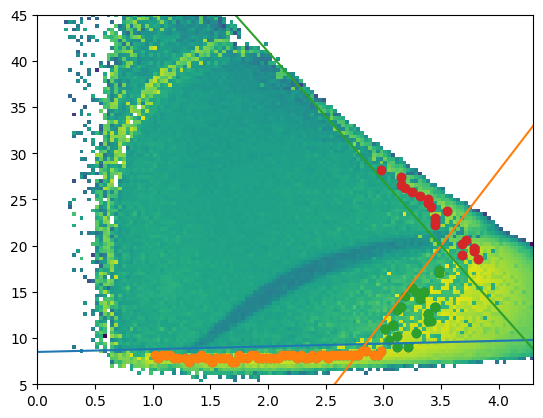

In [77]:
pars2_1 = [0.3,8.5]
pars2_2 = [16.25,-36.875]
pars2_3 = [-14,69]
f3x = []
f3y = []

#just one set of cuts needed for sector 1
f3x1 = []
f3y1 = []

f3x2 = []
f3y2 = []
f3x3 = []
f3y3 = []

for xbin in range(len(x3)):
    if x3[xbin] > 1.0 and x3[xbin] < 3.0:
        for ybin in range(len(y3)):
            if y3[ybin] > 0.0 and y3[ybin] < Linear(x3[xbin],*pars2_1):
#                 if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
#                     if rxs_z_yx1[ybin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])
                if rxs_z_xy3[xbin][ybin] == rxs_z_xy3[xbin].max():
                    if rxs_z_xy3[xbin].max() > 0.0:
                        f3x.append(x3[xbin])
                        f3y.append(y3[ybin])
                        f3x1.append(x3[xbin])
                        f3y1.append(y3[ybin])
                        
sec3_step1 = np.max(f3x)
print(sec3_step1)




for xbin in range(len(x3)):
    if x3[xbin] > sec3_step1 and x3[xbin] < 3.5:
        for ybin in range(len(y3)):
            if y3[ybin] > 0.0 and y3[ybin] < Linear(x3[xbin],*pars2_2):
                if rxs_z_yx3[ybin][xbin] == rxs_z_yx3[ybin].max():
                    if rxs_z_yx3[ybin].max() > 0.0:
                        f3x.append(x3[xbin])
                        f3y.append(y3[ybin])
                        f3x2.append(x3[xbin])
                        f3y2.append(y3[ybin])
                if rxs_z_xy3[xbin][ybin] == rxs_z_xy3[xbin].max():
                    if rxs_z_xy3[xbin].max() > 0.0:
                        f3x.append(x3[xbin])
                        f3y.append(y3[ybin])
                        f3x2.append(x3[xbin])
                        f3y2.append(y3[ybin])
                        
                        
for ybin in range(len(y3)):
    if y3[ybin] > 17 and y3[ybin] < 40:
        for xbin in range(len(x3)):
            if y3[ybin] > Linear(x3[xbin],*pars2_3) and x3[xbin]>1.5:
                if rxs_z_yx3[ybin][xbin] == rxs_z_yx3[ybin].max():
                    if rxs_z_yx3[ybin].max() > 0.0:
                        f3x.append(x3[xbin])
                        f3y.append(y3[ybin])
                        f3x3.append(x3[xbin])
                        f3y3.append(y3[ybin])
#                 if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
#                     if rxs_z_xy1[xbin].max() > 0.0:
#                         f1x.append(x1[xbin])
#                         f1y.append(y1[ybin])
plt.pcolormesh(x3,y3,rxs_z_yx3,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx3.max()))
plt.plot(cont_x,Linear(cont_x,*pars2_1))
plt.plot(cont_x,Linear(cont_x,*pars2_2))
plt.plot(cont_x,Linear(cont_x,*pars2_3))
plt.scatter(f3x,f3y)
plt.scatter(f3x1,f3y1)
plt.scatter(f3x2,f3y2)
plt.scatter(f3x3,f3y3)
plt.xlim((0.0,4.3))
plt.ylim((5,45))
plt.show()

[0.2544451  7.48479819]
[  9.03988581 -16.57603841]
[-11.88663352  64.32447622]


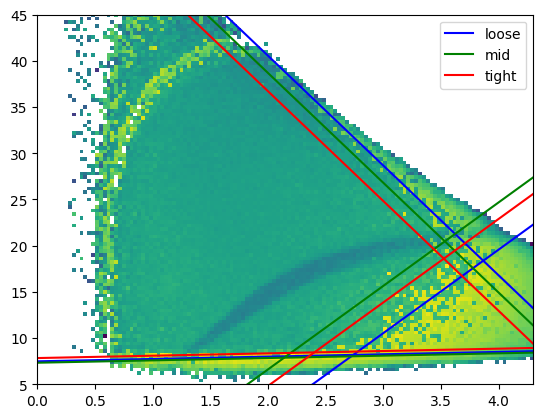

{{ 0.2544450957330327 , 7.837602853599366 },
{ 0.2544450957330327 , 7.720001298411902 },
{ 0.2544450957330327 , 7.484798188036975 }}
{{ 9.039885809675987 , -13.255923237462442 },
{ 9.039885809675987 , -14.915980821665197 },
{ 9.039885809675987 , -16.576038405867955 }}
{{ -11.886633518586457 , 60.48255529862684 },
{ -11.886633518586457 , 61.763195607165756 },
{ -11.886633518586457 , 64.3244762242436 }}


In [78]:
fit_pars21, fit_pars21_cov = op.curve_fit(Linear,f3x1,f3y1,p0=pars2_1,maxfev=5000)
fit_pars22, fit_pars22_cov = op.curve_fit(Linear,f3x2,f3y2,p0=pars2_2,maxfev=5000)
fit_pars23, fit_pars23_cov = op.curve_fit(Linear,f3x3,f3y3,p0=pars2_3,maxfev=5000)

print(fit_pars21)
print(fit_pars22)
print(fit_pars23)

plt.pcolormesh(x3,y3,rxs_z_yx3,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx3.max()))
plt.plot(cont_x,Linear(cont_x,*fit_pars21),color='b',label='loose')
plt.plot(cont_x,Linear(cont_x,*fit_pars22),color='b')
plt.plot(cont_x,Linear(cont_x,*fit_pars23),color='b')

plt.plot(cont_x,Linear(cont_x,fit_pars21[0],fit_pars11[1] + 2.0*np.sqrt(fit_pars21_cov[1][1])),color='g',label='mid')
plt.plot(cont_x,Linear(cont_x,fit_pars22[0],fit_pars12[1] + 0.2*np.sqrt(fit_pars22_cov[1][1])),color='g')
plt.plot(cont_x,Linear(cont_x,fit_pars23[0],fit_pars13[1] - np.sqrt(fit_pars23_cov[1][1])),color='g')

plt.plot(cont_x,Linear(cont_x,fit_pars21[0],fit_pars21[1] + 3.0*np.sqrt(fit_pars21_cov[1][1])),color='r',label='tight')
plt.plot(cont_x,Linear(cont_x,fit_pars22[0],fit_pars22[1] + 0.4*np.sqrt(fit_pars22_cov[1][1])),color='r')
plt.plot(cont_x,Linear(cont_x,fit_pars23[0],fit_pars23[1] - 1.5*np.sqrt(fit_pars23_cov[1][1])),color='r')

plt.xlim((0.0,4.3))
plt.ylim((5,45))
plt.legend()
plt.show()

print("{{",fit_pars21[0],",",fit_pars21[1] + 3.0*np.sqrt(fit_pars21_cov[1][1]),"},")
print("{",fit_pars21[0],",",fit_pars21[1] + 2.0*np.sqrt(fit_pars21_cov[1][1]),"},")
print("{",fit_pars21[0],",",fit_pars21[1],"}}")

print("{{",fit_pars22[0],",",fit_pars22[1] +0.4*np.sqrt(fit_pars22_cov[1][1]),"},")
print("{",fit_pars22[0],",",fit_pars22[1] + 0.2*np.sqrt(fit_pars22_cov[1][1]),"},")
print("{",fit_pars22[0],",",fit_pars22[1],"}}")


print("{{",fit_pars23[0],",",fit_pars23[1] -1.5*np.sqrt(fit_pars23_cov[1][1]),"},")
print("{",fit_pars23[0],",",fit_pars23[1] - np.sqrt(fit_pars23_cov[1][1]),"},")
print("{",fit_pars23[0],",",fit_pars23[1],"}}")

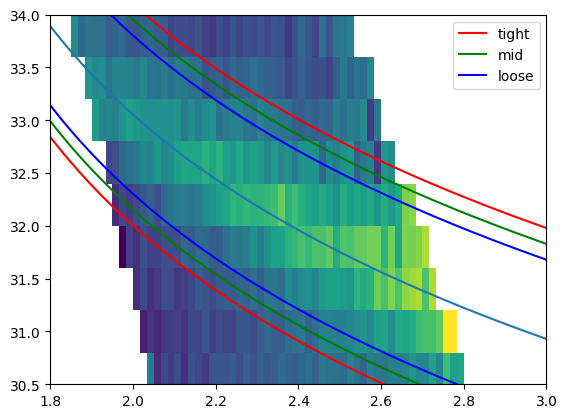

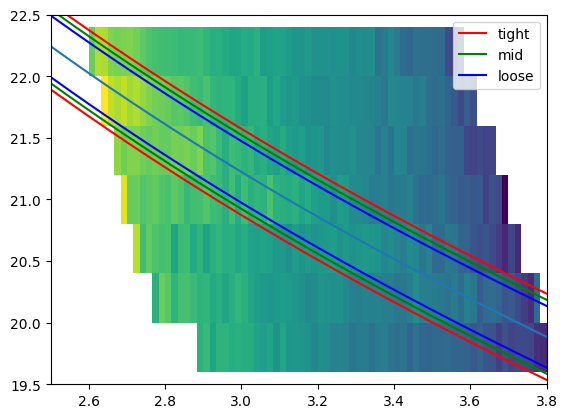

In [36]:
sig3 = [0.3,0.1]

for i in range(2):
#     if i ==0:
#         plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
#     else:
#         plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    plt.plot(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]))
    for cut in range(3):
        plt.plot(cont_x3[i],Gaus_Shift(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),sig3[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
        plt.plot(cont_x3[i],Gaus_Shift(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),sig3[i],cut_width[cut],1),color=cols[cut])
    plt.legend()
    plt.xlim((xbou3[i][0],xbou3[i][1]))
    plt.ylim((ybou3[i][0],ybou3[i][1]))
    plt.show()

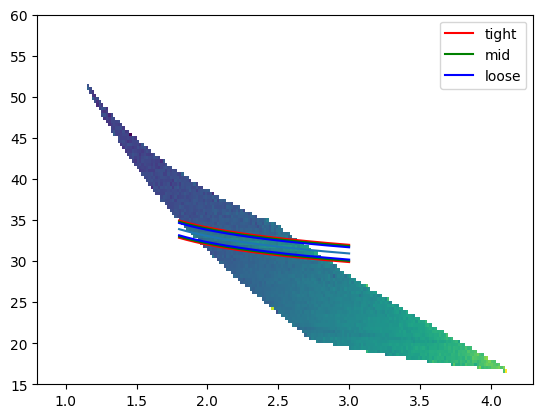

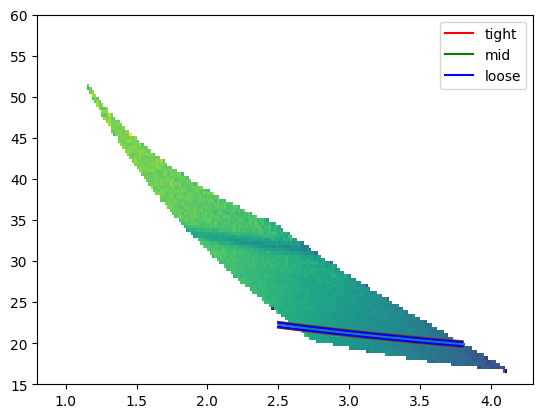

In [37]:
for i in range(2):
    if i ==0:
        plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xrs_z_yx[sec]),vmax=xrs_z_yx[sec].max()))
    else:
        plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    #plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    plt.plot(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]))
    for cut in range(3):
        plt.plot(cont_x3[i],Gaus_Shift(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),sig3[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
        plt.plot(cont_x3[i],Gaus_Shift(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),sig3[i],cut_width[cut],1),color=cols[cut])
    plt.legend()
    plt.xlim((0.8,4.3))
    plt.ylim((15,60))
    plt.show()

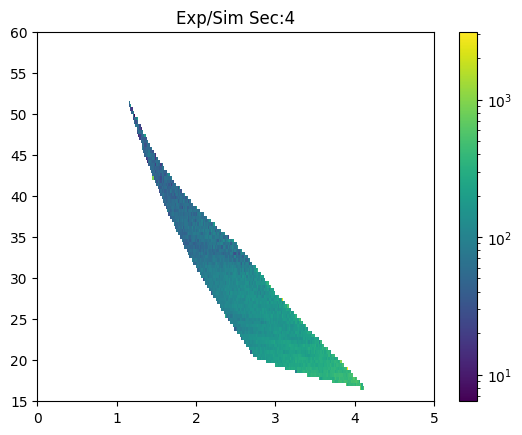

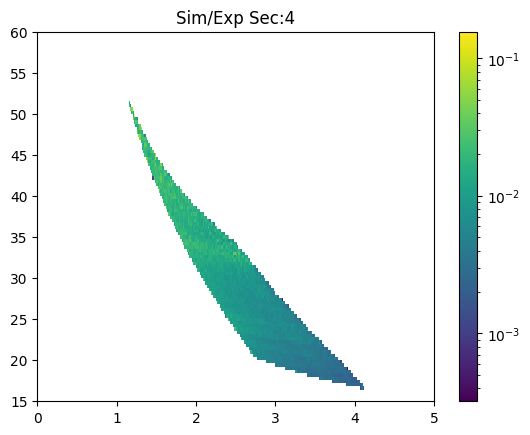

In [38]:
#Sector 4 Cuts
sec = 3

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xrs_z_yx[sec]),vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

In [39]:
#no obvious points of cuts for sector 4

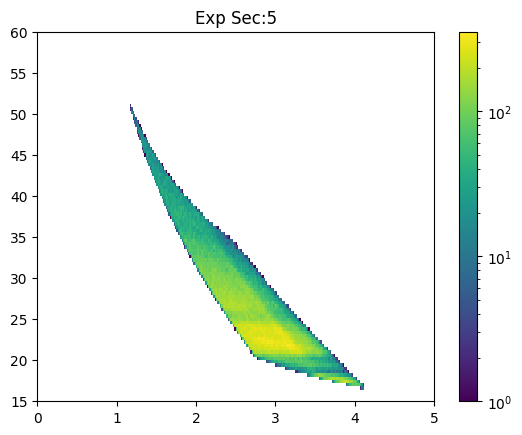

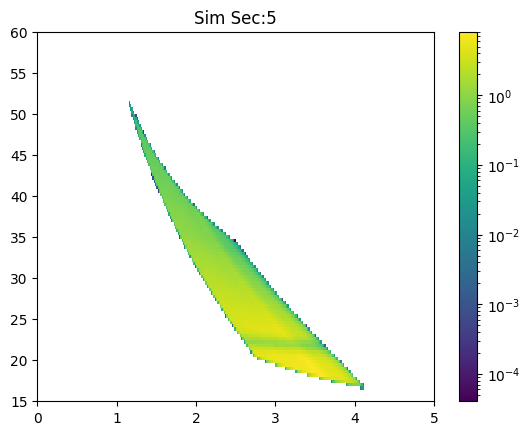

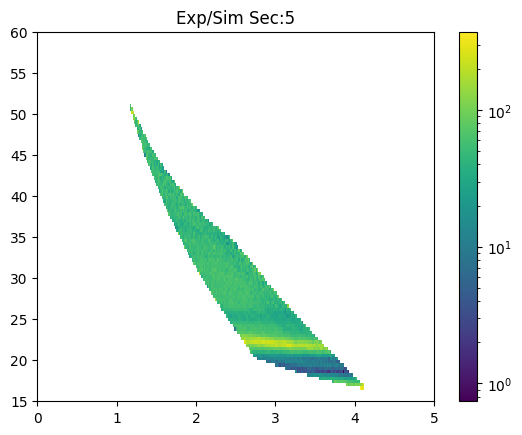

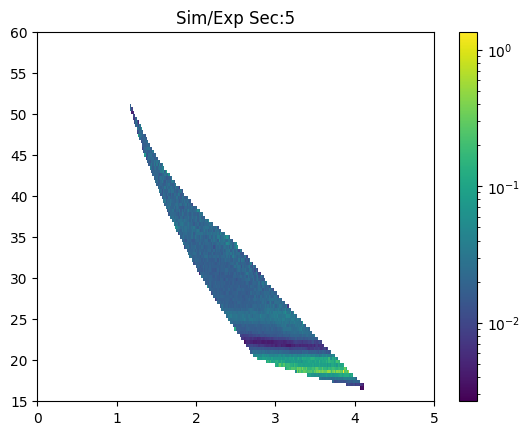

In [40]:
#Sector 5 Cuts
sec = 4

plt.pcolormesh(x,y,xs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xs_z_yx[sec]),vmax=xs_z_yx[sec].max()))
plt.title("Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

plt.pcolormesh(x,y,rs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rs_z_yx[sec]),vmax=rs_z_yx[sec].max()))
plt.title("Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xrs_z_yx[sec]),vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

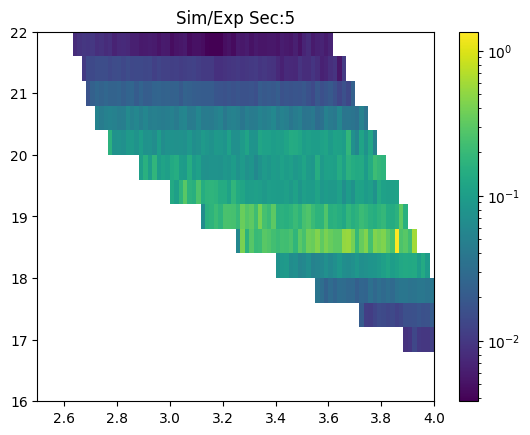

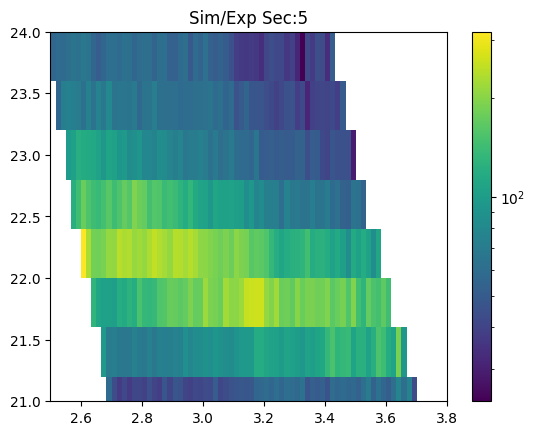

In [41]:
#Need two cuts
sec=4
xbou5 = [[2.5,4.0],[2.5,3.8]]
ybou5 = [[16,22],[21,24]]
x5 = [Bounds_on_Y(x,xbou5[0][0],xbou5[0][1]),Bounds_on_Y(x,xbou5[1][0],xbou5[1][1])]
y5 = [Bounds_on_Y(y,ybou5[0][0],ybou5[0][1]),Bounds_on_Y(y,ybou5[1][0],ybou5[1][1])]
z_xy5 = [Bounds_on_Z_XY(rxs_z_xy[sec],x,y,xbou5[0][0],xbou5[0][1],ybou5[0][0],ybou5[0][1]),Bounds_on_Z_XY(xrs_z_xy[sec],x,y,xbou5[1][0],xbou3[1][1],ybou5[1][0],ybou5[1][1])]
z_yx5 = [Bounds_on_Z_YX(rxs_z_yx[sec],x,y,xbou5[0][0],xbou5[0][1],ybou5[0][0],ybou5[0][1]),Bounds_on_Z_YX(xrs_z_yx[sec],x,y,xbou5[1][0],xbou3[1][1],ybou5[1][0],ybou5[1][1])]


for i in range(2):
    plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
    plt.title("Sim/Exp Sec:{}".format(sec+1))
    plt.xlim((xbou5[i][0],xbou5[i][1]))
    plt.ylim((ybou5[i][0],ybou5[i][1]))
    plt.colorbar()
    plt.show()

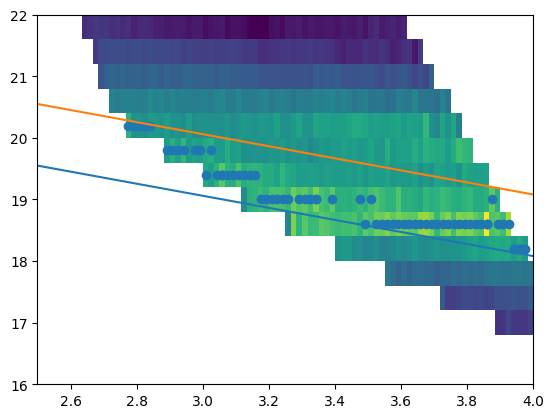

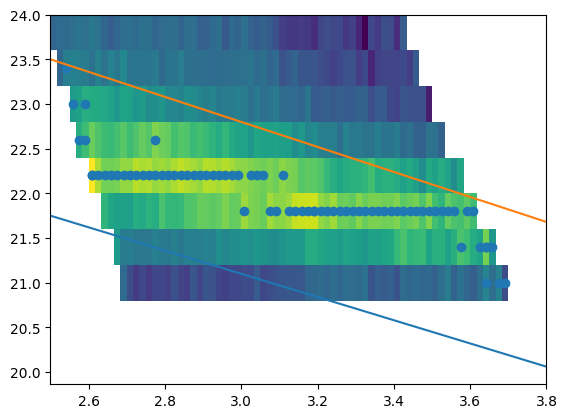

In [45]:

f5x = [[],[]]
f5y = [[],[]]

slice_pars  = [[[22,-0.98],[23,-0.98]],[[25,-1.3],[27,-1.4]]]
cont_x5 = [np.linspace(xbou5[0][0],xbou5[0][1],200),np.linspace(xbou5[1][0],xbou5[1][1],200)]

for s in range(2):
    for xbin in range(len(x5[s])):
        for ybin in range(len(y5[s])):
            if y5[s][ybin] > Linear(x5[s][xbin],slice_pars[s][0][0],slice_pars[s][0][1]) and y5[s][ybin] < Linear(x5[s][xbin],slice_pars[s][1][0],slice_pars[s][1][1]):
                if z_xy5[s][xbin][ybin] == z_xy5[s][xbin].max() and z_xy5[s][xbin][ybin]>0.0:
                    f5x[s].append(x5[s][xbin])
                    f5y[s].append(y5[s][ybin])
                if z_yx5[s][ybin][xbin] == z_yx5[s][ybin].max() and z_yx5[s][ybin][xbin]>0.0:
                    f5x[s].append(x5[s][xbin])
                    f5y[s].append(y5[s][ybin])
for i in range(2):
    plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
    plt.plot(cont_x5[i],Linear(cont_x5[i],slice_pars[i][0][0],slice_pars[i][0][1]))
    plt.plot(cont_x5[i],Linear(cont_x5[i],slice_pars[i][1][0],slice_pars[i][1][1]))
    
    #plt.plot(cont_x,Linear(cont_x,26,-1.84))
    #plt.plot(cont_x,Linear(cont_x,27.5,-1.84))
    plt.scatter(f5x[i],f5y[i])
    #plt.xlim((2.0,4.3))
    #plt.ylim((15,25))
    plt.show()
    
# for i in range(2):
#     for j in range(len(f5x[i])):
#         if j==0:
#             print("{{",f5x[i][j],",",f5y[i][j],"},")
#         elif j==len(f5x[i])-1:
#             print("{",f5x[i][j],",",f5y[i][j],"}}")
#         else:
#             print("{",f5x[i][j],",",f5y[i][j],"},")

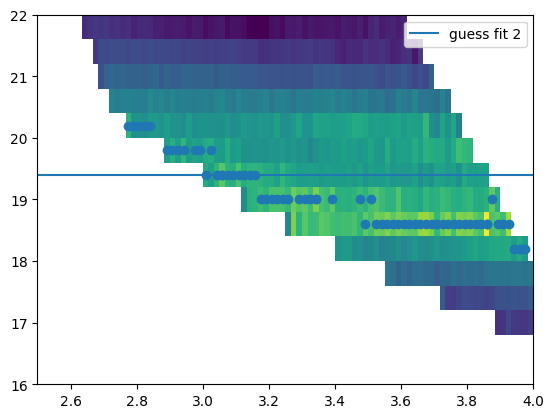

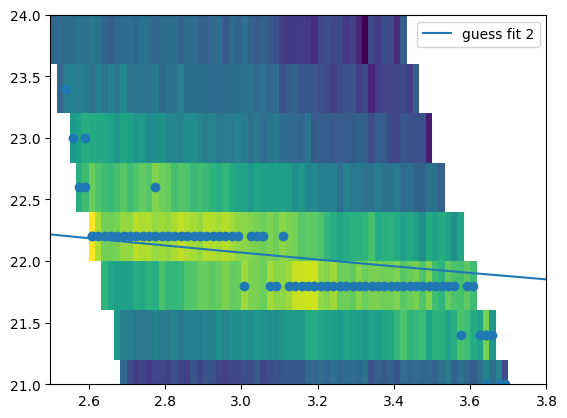

In [64]:
p05_f1 = [[15.69,-0.776,15.69],[15.73,-6.59,20.69]]
#p05_f2 = [[-1.98,0.262,21.5],[-2.29,-5.032,26.84]]

p05_f2 = [[0.0,0.0,19.4],[-2.29,-5.032,26.84]]

# #pars50_f1, pars_cov30_f1 = op.curve_fit(fit_func1,f5x[0],f5y[0],p0=p05_f1[0],maxfev=1000)
#pars50_f2, pars_cov30_f2 = op.curve_fit(fit_func2_mod,f5x[0],f5y[0],p0=p05_f2[0],maxfev=10000)
# #pars51_f1, pars_cov31_f1 = op.curve_fit(fit_func1,f5x[1],f5y[1],p0=p05_f1[1],maxfev=1000)
#pars51_f2, pars_cov31_f2 = op.curve_fit(fit_func2_mod,f5x[1],f5y[1],p0=p05_f2[1],maxfev=10000)

# #pars5_f1 = [pars50_f1,pars51_f1]
#pars5_f2 = [pars50_f2,pars51_f2]
cont_x5 = [np.linspace(xbou5[0][0],xbou5[0][1],200),np.linspace(xbou5[1][0],xbou5[1][1],200)]
#plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
sec=2
for i in range(2):
    plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
    #plt.plot(cont_x5[i],fit_func1(cont_x5[i],*pars5_f1[i]),label='fit 1')
    #plt.plot(cont_x5[i],fit_func2(cont_x5[i],*pars5_f2[i]),label='fit 2')
    
    #plt.plot(cont_x5[i],fit_func1(cont_x5[i],*p05_f1[i]),label='fit 1')
    plt.plot(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),label='guess fit 2')
    plt.scatter(f5x[i],f5y[i])
    plt.legend()
    plt.xlim((xbou5[i][0],xbou5[i][1]))
    plt.ylim((ybou5[i][0],ybou5[i][1]))
    plt.show()

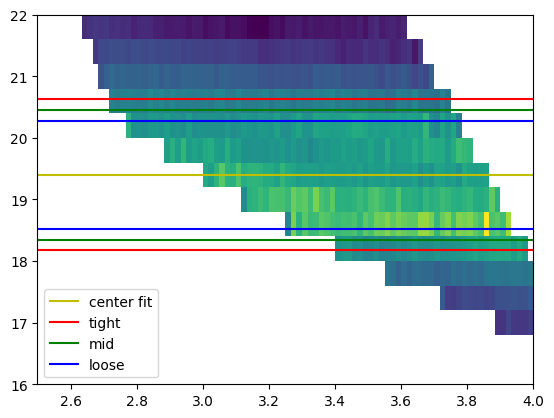

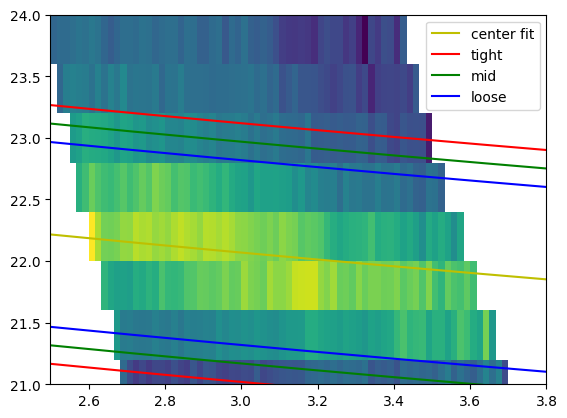

In [65]:
sig5 = [0.35,0.3]


def Gaus_Shift2(xarray_,yarray_,sig_,nsig_,side_):
    #print(side_)
    out = []
    for i in range(len(xarray_)):
        #print(side_*nsig_*sig_,yarray_[i],yarray_[i]+side_*nsig_*sig_)
        out.append(yarray_[i]+side_*nsig_*sig_)
    return out


for i in range(2):
#     if i ==0:
#         plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
#     else:
#         plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
    plt.plot(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),label='center fit',color='y')
    for cut in range(3):
        plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
        plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],1),color=cols[cut])
    plt.legend()
    plt.xlim((xbou5[i][0],xbou5[i][1]))
    plt.ylim((ybou5[i][0],ybou5[i][1]))
    plt.show()
    
# for i in range(2):
#     for j in range(len(cont_x5[i])):
#         print(fit_func2(cont_x5[i],*p05_f2[i])[j]-Gaus_Shift2(cont_x5[i],fit_func2(cont_x3[i],*p05_f2[i]),sig5[i],cut_width[cut],-1)[j],fit_func2(cont_x5[i],*p05_f2[i])[j],Gaus_Shift2(cont_x5[i],fit_func2(cont_x3[i],*p05_f2[i]),sig5[i],cut_width[cut],1)[j]-fit_func2(cont_x5[i],*p05_f2[i])[j])
        
        

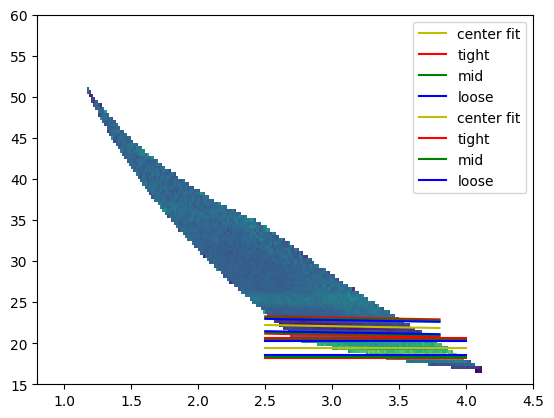

In [70]:
sec = 4


#     if i ==0:
#         plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
#     else:
#         plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    #plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    #rmesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
for i in range(2):
    plt.plot(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),label='center fit',color='y')
    for cut in range(3):
        plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
        plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],1),color=cols[cut])
    plt.legend()
    plt.xlim((0.8,4.5))
    plt.ylim((15,60))
    
plt.show()

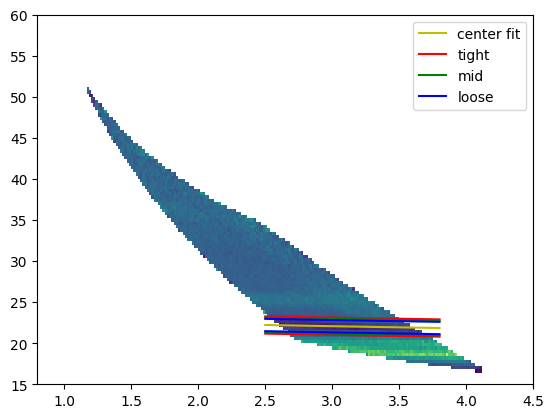

In [338]:
sec=4
i=1

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
rmesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
plt.plot(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),label='center fit',color='y')
for cut in range(3):
    plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
    plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],1),color=cols[cut])
plt.legend()
plt.xlim((0.8,4.5))
plt.ylim((15,60))
plt.show()



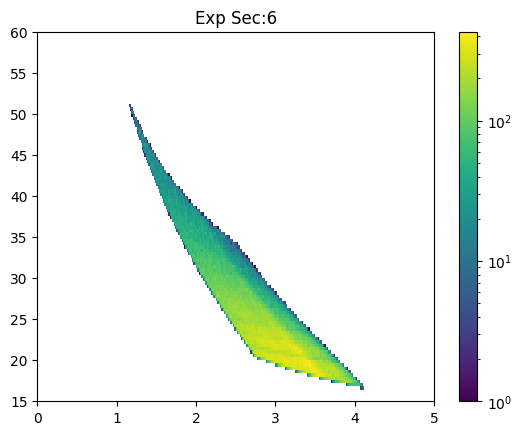

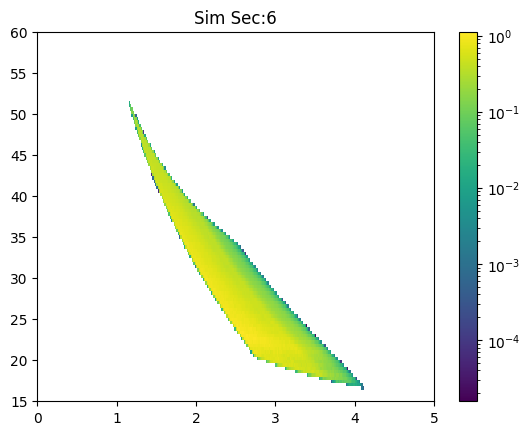

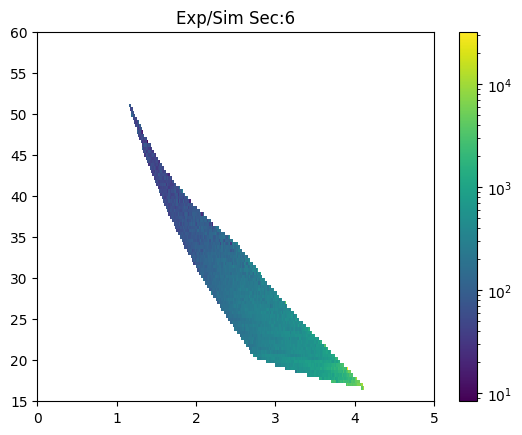

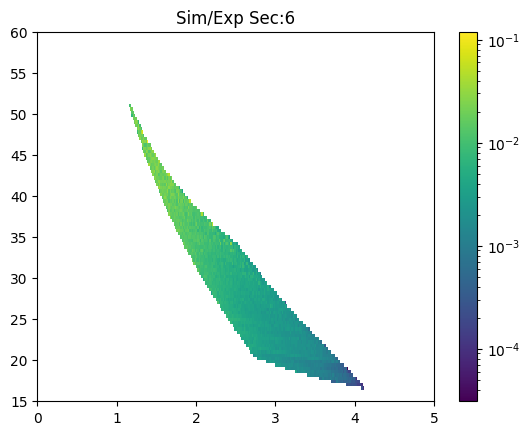

In [339]:
#Sector 6 Cuts
sec = 5

plt.pcolormesh(x,y,xs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xs_z_yx[sec]),vmax=xs_z_yx[sec].max()))
plt.title("Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

plt.pcolormesh(x,y,rs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rs_z_yx[sec]),vmax=rs_z_yx[sec].max()))
plt.title("Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xrs_z_yx[sec]),vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

In [ ]:
#not seeing anything worth cutting


In [342]:
print("Perform E16 Electron Kinematic Efficiency Cuts")
print("[sec]")
print("{true,true,true,false,true,false}")

Perform E16 Electron Kinematic Efficiency Cuts
[sec]
{true,true,true,false,true,false}


In [ ]:
print("E16 Electron Kinematic Efficiency parameters")
print("sec1")
